# 👨‍💻 Análise, Limpeza e Predição de Dados - Mudança de emprego para Cientistas de dados 👩‍💻

**SUMÁRIO:**

1. Importação das bibliotecas;
2. Importação do dataset;
3. Observações iniciais;
4. Limpando dados;
5. Analisando dados;
6. Conclusões da análise;
7. Predições;
8. Métricas;
9. Conclusões finais.


As informações do dataset podem ser vistas a seguir:

**INFORMAÇÕES DO DATASET:**


* **enrollee_id**: ID exclusivo para o candidato
* **city**: Código da cidade
* **city_ development _index**: Índice de desenvolvimento da cidade (em escala)
* **gender**: Gênero do candidato
* **relevant_experience**: Experiência relevante do candidato
* **enrolled_university**: Tipo de curso universitário matriculado, se houver
* **education_level**: Nível de educação do candidato
* **major_discipline**: Major principal de educação do candidato
> * STEM: Science, Technology, Engineering, and Math Degree
> * Business Major: Administração de negócios
> * Humanities: Humanidades
> * Arts: Artes
> * No major: Não faz/possui um major
> * Other: Outro
* **experience**: Experiência total do candidato em anos
* **company_size**: Nº de funcionários na empresa do empregador atual
* **company_type**: Tipo de empregador atual
* **last_new_job**: Diferença em anos entre o emprego anterior e o emprego atual
* **training_hours**: Horas de treinamento concluidas
* **target**: 0 - Não está procurando uma mudança de emprego ou 1 - Procurando
uma mudança de emprego

#1. Importação das bibliotecas

Antes de começarmos a trabalhar, precisamos importar as bibliotecas básica, para visualização, para os modelos de predição e para as métricas:

In [1]:
#operações básicas
import numpy as np
import pandas as pd

#para visualização
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

#para os modelos de predição
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#para as métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

#2. Importação dos datasets

Em seguida, devemos importar o nosso dataset:

In [2]:
df = pd.read_csv("train.csv") 

#3. Observações iniciais

Para conhecermos um pouco o estilo do nosso dataset, podemos ver suas primeiras linhas:

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Também devemos ver como estão as informações ao longo do dataset, para termos uma noção inicial do que deverá ser tratado:

In [4]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Como observações iniciais, temos que:

*   Existem 19158 entradas, mas em algumas features, o número não é esse, o que retrata a existência de dados faltantes;
*   Possuímos 10 colunas com dados categóricos e 4 com dados númericos; esta divisão está correta de acordo com as features. 



Percebemos que o valor da coluna 'relevent_experience' está escrito errado, então podemos alterá-lo para 'relevant_experience':

In [6]:
df.columns 

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [7]:
df.columns = ['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevant_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target']

#4. Limpando dados

## Retirando linhas duplicadas

A primeira análise que devemos ter ao olhar o dataset é vermos se ele possui linhas duplicadas:

In [8]:
df[df.duplicated()]

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


Com isso, verificamos que não há linhas duplicadas, portanto, devemos seguir para a verificação de cada feature com dados faltantes.

## Verificação e limpeza das colunas com dados faltantes

Podemos começar pela coluna "gender":

In [9]:
df['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

Percebemos que os dados estão categorizados corretamente, o problema é que existem muitos dados faltantes. Antes de decidirmos como os trataremos, podemos verificar as próximas features, seguindo por "enrolled_university":

In [10]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

Verificaremos, agora, "education_level":



In [11]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

Em seguida, verificaremos "major_discipline":

In [12]:
df['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

A próxima feature a ser verificada é "experience":

In [13]:
df['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

Em seguida, "company_size":

In [14]:
df['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

Verificaremos, também, os dados de "company_type":

In [15]:
df['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

Por fim, "last_new_job":

In [16]:
df['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

Com isso, concluímos que todas as colunas possui os dados em categorias e valores que não são discrepantes, no entanto, o maior problema é a grande quantidade de dados faltantes. Para não removermos grande parte do dataset, seguiremos a construção do modelo com os valores faltantes; caso seja necessário, apagaremo-nos (o que reduziria muito o dataset).

# 5. Analisandos dados

## Adotando definições iniciais:

Antes de começarmos as análises, podemos definir a palheta de cores e o estilo dos gráficos:

In [17]:
#Definindo a nossa palheta de cores:
sns.set_palette('hsv_r')

#Definindo o nosso estilo para o fundo dos gráficos:
sns.set_style('darkgrid')

## Análises ao longo das features

Podemos começar nossa análise verificando se os dados em questão refletem uma distribuição igualitária entre os gêneros:

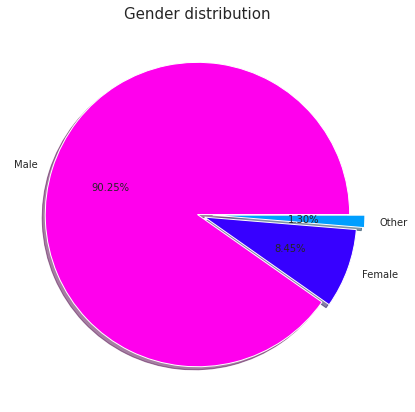

In [18]:
labels = df['gender'].value_counts().index
sizes = df['gender'].value_counts().values
explode = [0,0.05, 0.1]
plt.figure(figsize = (7,7))
plt.pie(sizes, labels = labels, explode = explode, shadow = True, autopct = '%1.2f%%')
plt.title('Gender distribution', fontsize = 15)
plt.show()

Com isso, percebemos que, majoritariamente, o dataset representa a população masculina.

Podemos, então, questionar se a distribuição dos gêneros é relacionada à experiência relevante dos candidatos:

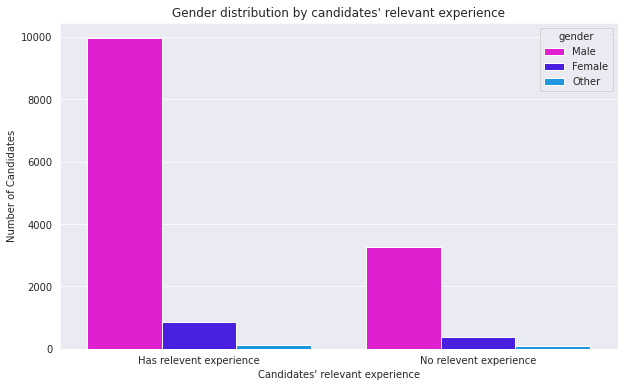

In [19]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'relevant_experience', data = df, hue = 'gender')
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates' relevant experience")
plt.title("Gender distribution by candidates' relevant experience")
plt.show()

Percebemos, então, que a maioria dos candidatos possui experiência relevante: o fator "gênero" não influencia tanto essa questão, pois todos os gêneros possuem mais experiência relevante. 

Questionaremos agora como os candidatos estão distribuídos em relação ao curso universitário matriculado:

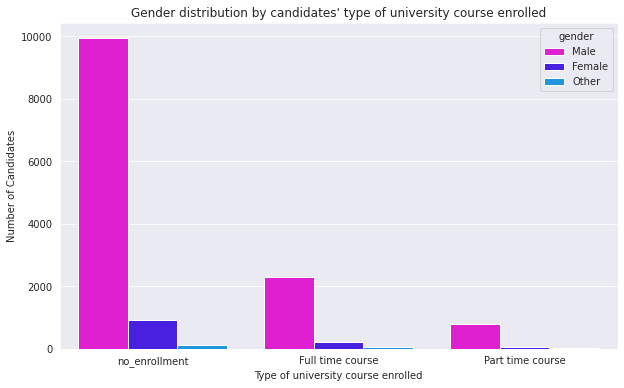

In [20]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'enrolled_university', data = df, hue = 'gender')
plt.ylabel('Number of Candidates')
plt.xlabel('Type of university course enrolled')
plt.title("Gender distribution by candidates' type of university course enrolled")
plt.show()

Percebemos, então, que a maioria dos candidatos estão localizados na categoria de "no_enrollment", que reflete o fator de não estarem matriculados em um curso universitário. Uma questão que pode ser levantada em uma pesquisa futura da empresa é: esse fator se deve aos candidatos já possuírem um curso universitário, ou ainda não ingressaram em nenhum?

Um fator que é possível ser visto é a grande quantidade de homens, o que já foi explicitado acima, o que não deixa clara a análise em relação aos demais gêneros. Por isso, faremos uma análise específica para não-homens:

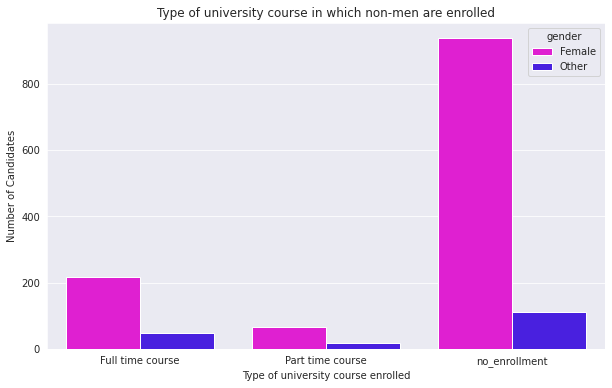

In [21]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'enrolled_university', data = df[df['gender'] != 'Male'], hue = 'gender')
plt.ylabel('Number of Candidates')
plt.xlabel('Type of university course enrolled')
plt.title("Type of university course in which non-men are enrolled")
plt.show()

Percebemos, então, que as tendências dos outros gêneros além do masculino seguem a mesma tendência deste. Fator que é interessante pontuarmos é que classificades em "Other" possuem uma proporção menor de não-matriculades para matriculades em curso de tempo integral, quando analisades em relação a homens e mulheres, o que reflete um avanço em relação à inclusão dessas pessoas em ambientes majoritariamente ocupados por homens. 


Voltando à análise com todos os candidatos, podemos ver sua distribuição relacionada ao nível de educação:

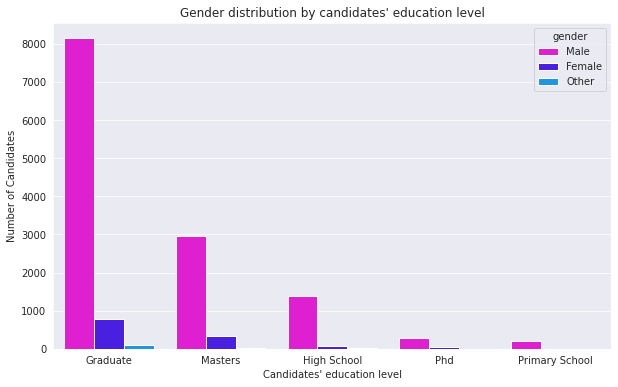

In [22]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'education_level', data = df, hue = 'gender')
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates' education level")
plt.title("Gender distribution by candidates' education level")
plt.show()

Percebemos, então, que a maioria dos candidatos é matriculada em cursos de graduação, seguido de pós-graduandos e, em seguida, Ensino Médio. Fator interessante de se pontuar também é que possuem mais pessoas com Ensino Médio apenas do que pessoas com Phd, o que reflete uma maior atenção das empresas em relação ao fato de o candidato saber trabalhar, diferentemente de ramos empregatícios tradicionais, que se preocupam excessivamente com o academicismo. 

Nossa próxima questão diz respeito à distribuição dos candidatos por grande área de educação:

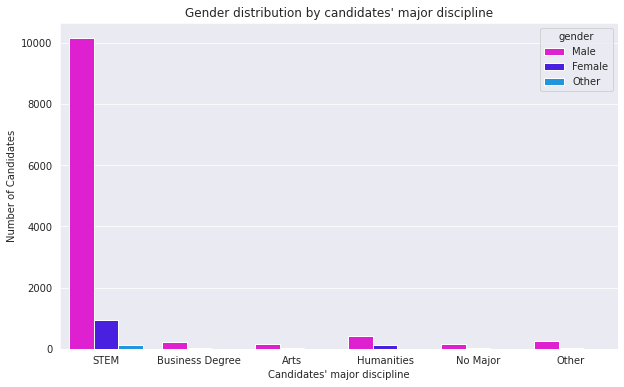

In [23]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'major_discipline', data = df, hue = 'gender')
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates' major discipline")
plt.title("Gender distribution by candidates' major discipline")
plt.show()

Concluímos que a área de STEM abrange grande parte dos candidatos em análise, haja visto que são cientistas de dados, o que reflete uma falta de inclusão destes em outros setores. No entanto, a segunda maior grande área com candidatos é a de Humanidades, o que reflete a necessidade destes profissionais nesses outros setores.

Em seguida, podemos ver a distribuição dos candidatos, relacionando seus gêneros aos índices de desenvolvimento das cidades me que estão encaixados:

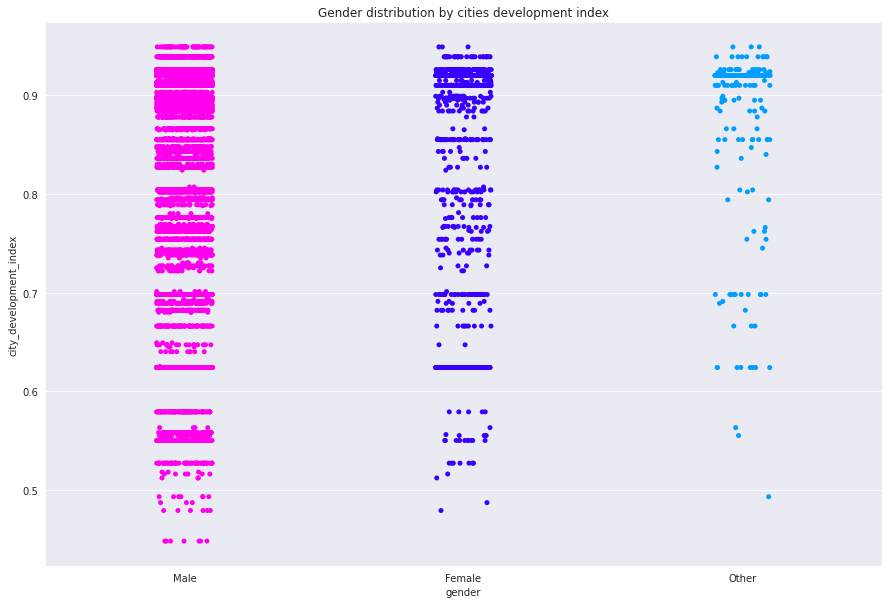

In [24]:
plt.figure(figsize = (15,10))
sns.stripplot(x = 'gender', y = 'city_development_index', data = df)
plt.title("Gender distribution by cities development index")
plt.show()

Percebemos, então, que a maior concentração de pessoas do gênero feminino, ou englobados com "Other" é mais restrita a cidades com índice de desenvolvimento alto. Por mais que a concentração de homens também esteja nestas cidades, eles apresentam também relevante concentração em cidades com outros índices. Com isso, podemos perceber que os avanços das conquistas femininas e dos outros gêneros (além do masculino) vêm diminuindo a acentuada diferença da participação destes em papéis importantes, como o de cientista de dados. 

Nossa próxima análise diz respeito à distribuição do tipo da companhia relacionado ao seu tamanho:

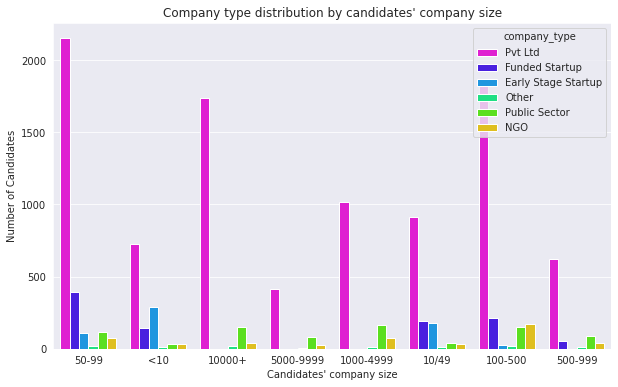

In [25]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'company_size', data = df, hue = 'company_type')
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates' company size")
plt.title("Company type distribution by candidates' company size")
plt.show()

Com isso, percebemos que candidatos se concentram em Sociedades Limitadas (Pvt Ltd); sua distribuição em relação ao tamanho da empresa é arbitrária, haja visto que a maior concentração estão em faixas como 50-99 e 10000+. Uma análise que podemos fazer diz respeito às companhias caracterizadas Startups (Funded startup e Early Stage Startup), já que concentram seus candidatos em companhias de menor tamanho. Companhias do Setor Público (Public Sector) estão presentes em companhias de todos os tipos, mas são mais expressivas em companhias maiores (acima de 49 funcionários). Por sua vez, ONGs (NGO) concentram seus candidatos em companhias de tamanho médio (entre 100 e 4999 funcionários). 

A análise a seguir diz respeito à distribuição de gêneros relacionada ao tipo de cada companhia:

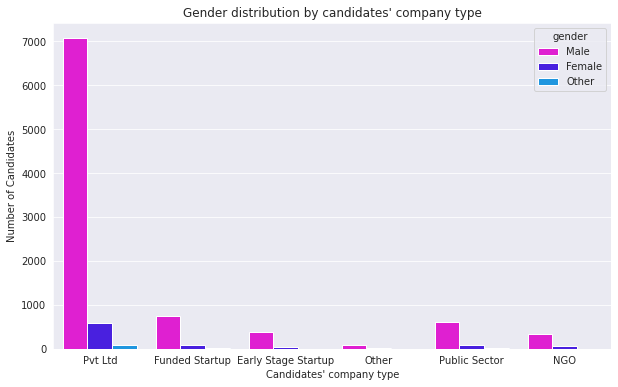

In [26]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'company_type', data = df, hue = 'gender')
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates' company type")
plt.title("Gender distribution by candidates' company type")
plt.show()

Acompanhando as outras análises que fizemos, nesta também há desigualdade de gênero: grande parte das mulheres e outros gêneros além do masculino são localizados em Sociedades Limitadas (Pvt Ltd). No entanto, neste caso, a parcela masculina também é extremamente concentrada neste tipo de companhia, o que reflete a necessidade de, além de uma maior diversidade de gênero, uma maior diversidade de cientistas de dados em diferentes tipos de companhias.

## Análises relacionando a target

As próximas análise, para os fins das predições, serão as de maior importância, haja visto que estarão relacionadas à coluna target. Buscaremos, então, encontrar relações que podem ser úteis para a construção dos modelos posteriormente.

Podemos, primeiramente, fazer um heatmap para verificarmos quais valores numéricos, se houver, são relacionados à target:

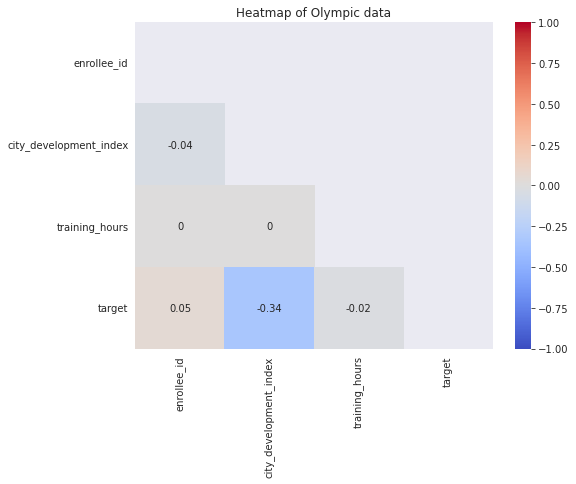

In [27]:
plt.figure(figsize=(8,6))

#O parâmetro mask faz com que o gráfico não fique espelhado, para facilitar a visualização:
corr = df.corr()
mask = mask = np.zeros_like(corr) 
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, vmax=1, vmin=-1, annot=np.round(corr.values, 2), cmap='coolwarm', mask=mask) 
plt.title("Heatmap of Olympic data")
plt.show()

Percebemos, então, que nenhuma feature numérica é relacionada diretamente à coluna target; no entanto, o índice de desenvolvimento da cidade apresenta, com maior relevância, uma relação indiretamente proporcional à target: isso ocorre, pois quanto maior o índice de desenvolvimento da cidade, menor é o valor da target e, como o valor da target é 0 (não deseja trocar de emprego) ou 1 (deseja trocar de emprego), isso reflete o fato dos candidatos dessas cidades não estarem buscando novos empregos, haja visto que já estão confortáveis em suas cidades e possuem melhores condições de vida.

Vale ressaltar que features como ID do candidato e código da cidade serão retirados para a construção dos modelos, já que não são importantes para as predições.

Podemos ver mais claramente, então, um boxplot do índice de desenvolvimento da cidade em relação à target:

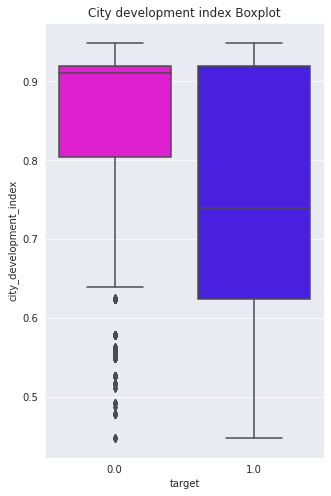

In [28]:
plt.figure(figsize = (5,8))
sns.boxplot(x= 'target', y = 'city_development_index', data = df)
plt.title('City development index Boxplot')
plt.show()

Percebemos, então, que, assim como foi dito anteriomente, quanto menor o índice de desenvolvimento da cidade, maior é o número de candidatos que deseja trocar de emprego: isso pode ser visto no boxplot pela concentração de maior altura para os candidatos que desejam trocar de emprego (target = 1.0).

Podemos ver, então, a distribuição dos candidatos que buscam trocar de emprego, relacionando-os a seus gêneros:

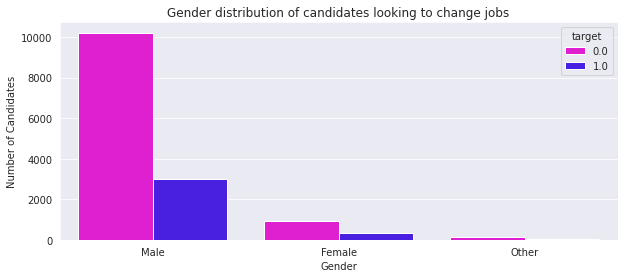

In [29]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'gender', data = df, hue = 'target')
plt.ylabel('Number of Candidates')
plt.xlabel('Gender')
plt.title('Gender distribution of candidates looking to change jobs')
plt.show()

Percebemos, então, que não há uma clara relação entre gênero e desejo de trocar emprego, já que a proporção dos valores da target entre os gêneros é bem similar.

Podemos, em seguida, analisar a influência da experiência relevante para a target:

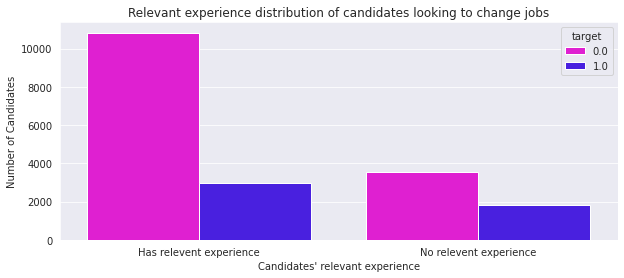

In [30]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'relevant_experience', data = df, hue = 'target')
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates' relevant experience")
plt.title('Relevant experience distribution of candidates looking to change jobs')
plt.show()

Com isso, concluímos que candidatos com experiência relevante possuem um menor desejo de trocarem emprego proporcionalmente, quando comparados aos que não possuem experiência relevante, o que será de grande importância para as predições.

A nossa próxima análise será sobre a influência do tipo de curso universitário em que os candidatos são matriculados:

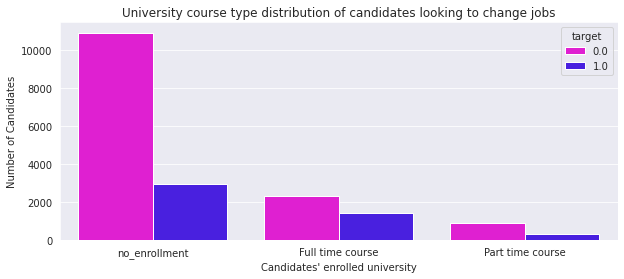

In [31]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'enrolled_university', data = df, hue = 'target')
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates' enrolled university")
plt.title('University course type distribution of candidates looking to change jobs')
plt.show()

Percebemos, então, que, proporcionalmente, candidatos sem matrícula em curso universitário no momento estão mais propensos a não desejarem trocar de emprego. Uma justificativa para isso pode ser o fato de que os estudantes universitários não estejam conseguindo conciliar a vida profissional e a vida estudantil: isso é visto, principalmenente, nos matriculados em curso de período integral, em que parte expressante deseja trocar de emprego.

O próximo gráfico dirá respeito à influência do nível de educação dos candidatos:

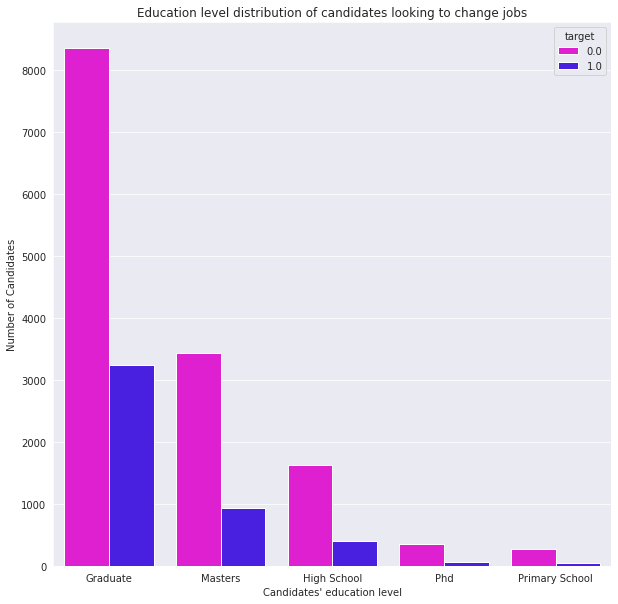

In [32]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'education_level', data = df, hue = 'target')
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates' education level")
plt.title('Education level distribution of candidates looking to change jobs')
plt.show()

Por mais que não possamos tirar grandes conclusões deste gráfico, percebemos que a proporção de mestres que desejam trocar de emprego é menor do que a de graduados; isso pode ocorrer pois já tem maior chance de estarem em uma posição que almejaram no trabalho.

Podemos verificar, também, a influência da grande área dos candidatos em relação à target:

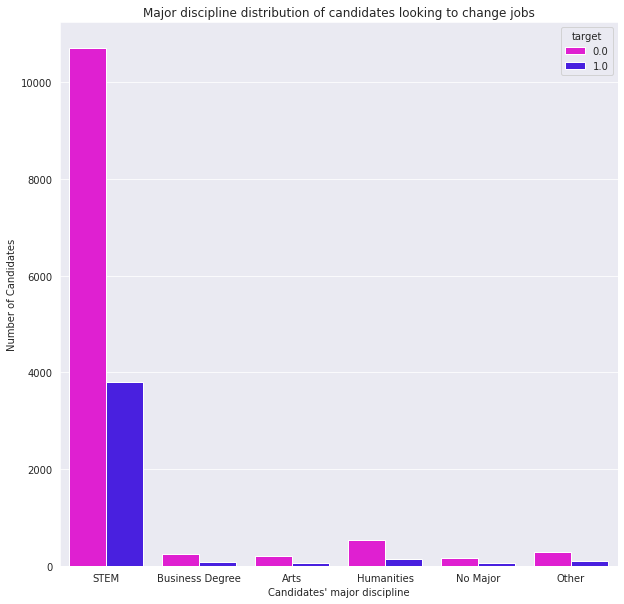

In [33]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'major_discipline', data = df, hue = 'target')
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates' major discipline")
plt.title('Major discipline distribution of candidates looking to change jobs')
plt.show()

Devido à grande quantidade de candidatos da área STEM, não conseguimos tirar relevantes análises.

Podemos, então, passar para a influência na target da experiência de cada candidato:

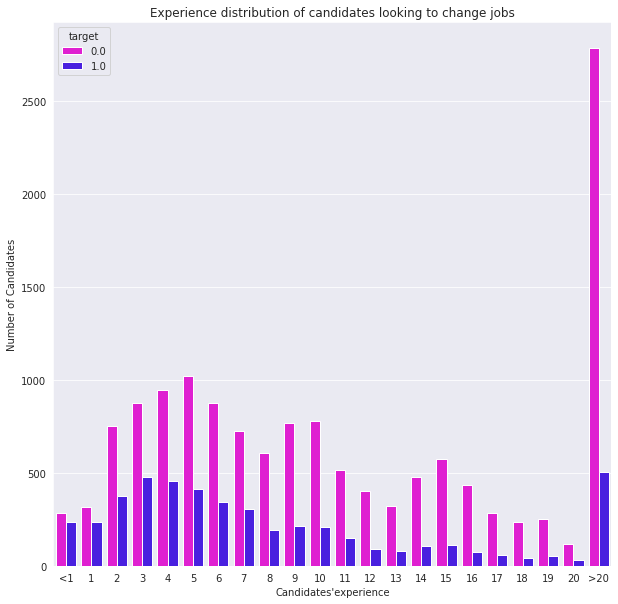

In [34]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'experience', data = df, hue = 'target', order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20'])
plt.ylabel('Number of Candidates')
plt.xlabel("Candidates'experience")
plt.title('Experience distribution of candidates looking to change jobs')
plt.show()

Percebemos que, quanto menor a experiência dos candidatos, maior é a probalidade de eles quererem trocar de emprego. Isso diz respeito ao fato de que podem ser candidatos que ainda não se encontraram no nicho em que desejam trabalhar, ou que não desejam continuar na profissão. Por outro lado, candidatos com mais anos de experiência tendem a ter uma carreira consolidada, a qual não seria tão vantajoso de abandonar.

A próxima análise a ser feita será sobre a influência do tamanho da companhia dos candidatos:

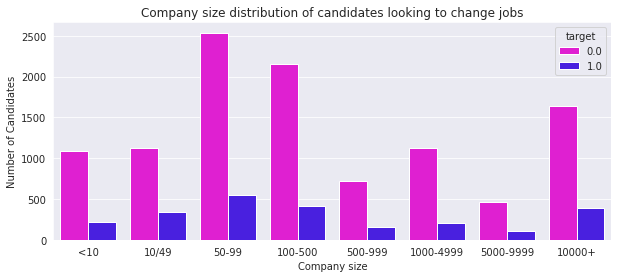

In [35]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'company_size', data = df, hue = 'target', order = ['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+'])
plt.ylabel('Number of Candidates')
plt.xlabel('Company size')
plt.title('Company size distribution of candidates looking to change jobs')
plt.show()

Com esses dados, não conseguimos tirar nenhuma análise relevante, pois sua distribuição é arbitrária.

A próxima análise a ser feita será sobre a influência do tipo da companhia em que os candidatos estão:

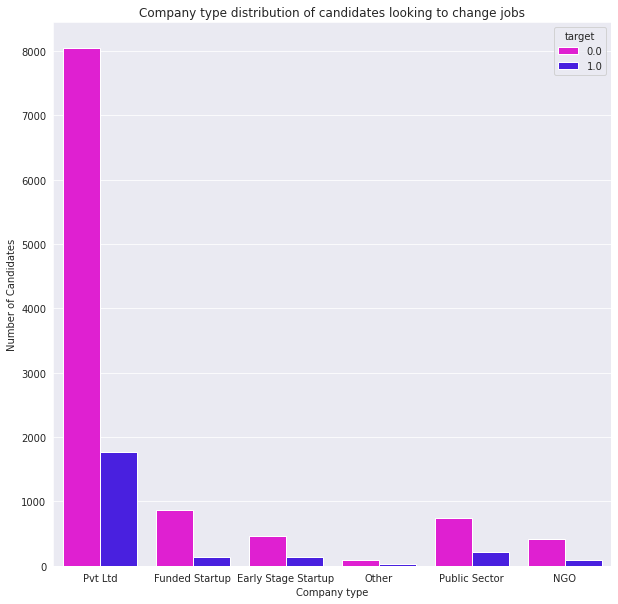

In [36]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'company_type', data = df, hue = 'target')
plt.ylabel('Number of Candidates')
plt.xlabel('Company type')
plt.title('Company type distribution of candidates looking to change jobs')
plt.show()

Com este gráfico, também não conseguimos chegar a alguma análise relevante de forma rápida.

Podemos, então, tentar uma última análise, que retrata a influência da diferença de anos entre o emprego anterior e o atual dos candidatos:

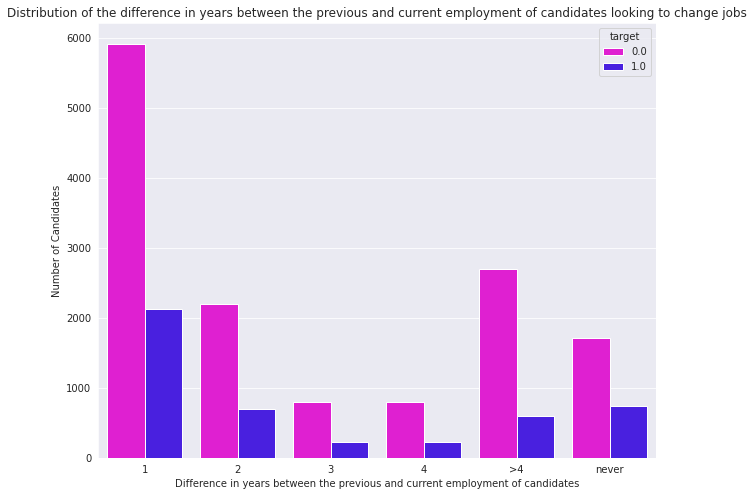

In [37]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'last_new_job', data = df, hue = 'target', order = ['1', '2', '3', '4', '>4', 'never'])
plt.ylabel('Number of Candidates')
plt.xlabel('Difference in years between the previous and current employment of candidates')
plt.title('Distribution of the difference in years between the previous and current employment of candidates looking to change jobs')
plt.show()

Com isso, não podemos chegar a muitos pontos com a análise, mas pode-se observar que a proporção de candidatos com mais de quatro anos de diferença entre o emprego anterior e o atual que desejam trocar de emprego é menor do que os com poucos anos de diferença e também dos que nunca trocaram de emprego: isso retrata o fato de essa faixa representar funcionários que já estão há um tempo considerável na sua companhia e, portanto, tentdem a se sentir mais confortáveis com seus empregos.

## Ajustes finais no dataset antes das predições

Como possuímos duas colunas que não interferem nas predições, podemos retirá-las:

In [38]:
df.drop(['enrollee_id', 'city'], axis=1, inplace=True)

# 6. Conclusões das análises

Podemos, portanto, resumir nossas análises nos seguintes pontos:    
* Grande parte dos candidatos em análise é composta por homens, mas também há homens e candidatos que não se identificam com nenhum desses rótulos;
* A maioria dos candidatos possuem experiência relevância, e o gênero não é uma feature tão relevante para esse caso;
* Grande número dos candidatos não está matriculado em curso universitário;
* A maioria dos candidatos é matriculada em cursos de graduação, seguido de pós-graduandos e, em seguida, Ensino Médio;
* A maior grande área com candidatos é STEM (a diferença em relação às outras áreas é bem grande), seguida pelas Humanidades;
* A maior concentração de pessoas do gênero feminino, ou englobados com "Other" é mais restrita a cidades com índice de desenvolvimento alto;
* Candidatos se concentram em Sociedades Limitadas (Pvt Ltd); sua distribuição em relação ao tamanho da empresa é arbitrária;
* A grande ocorrência de candidatos em Sociedade Limitadas e, especificamente, de candidates não-homens neste ramo indicam a necessidade de, além de uma maior diversidade de gênero, uma maior diversidade de cientistas de dados em diferentes tipos de companhias;
*  O índice de desenvolvimento da cidade apresenta, com maior relevância, uma relação indiretamente proporcional à target;
* Não há uma clara relação entre gênero e desejo de trocar emprego;
* Candidatos com experiência relevante possuem um menor desejo de trocarem emprego;
*  Candidatos sem matrícula em curso universitário no momento estão mais propensos a não desejarem trocar de emprego;
* A proporção de mestres que desejam trocar de emprego é menor do que a de graduados;
* Quanto menor a experiência dos candidatos, maior é a probalidade de eles quererem trocar de emprego.

# 7.1 Predições - Com dados faltantes

Para criarmos os modelos de predição, podemos, inicialmente, testá-los com os dados faltantes, assim como fizemos as análises. Em seguida, podemos ver suas métricas e compará-las aos demais modelos.

## Adotando atribuições iniciais

Criaremos listas vazias, inicialmente, para que, ao final, possamos comparar todas as métricas gráficos.

In [39]:
acuracias = []
precisoes = []
revocacoes = [] 
f1_score = []

In [40]:
dados_faltantes = ['com', 'com', 'com', 'com', 'com', 'com', 'apagados', 'apagados', 'apagados', 'apagados', 'apagados', 'apagados', 'substituídos','substituídos', 'substituídos', 'substituídos', 'substituídos', 'substituídos']

In [41]:
modelos = ['Regressão Logística', 'Árvore de Decisão', 'Random Forest', 'KNN', 'Naive Bayes', 'SVM', 'Regressão Logística', 'Árvore de Decisão', 'Random Forest', 'KNN', 'Naive Bayes', 'SVM', 'Regressão Logística', 'Árvore de Decisão', 'Random Forest', 'KNN', 'Naive Bayes', 'SVM']

## Ajustando as features categóricas

Como possuímos muitas features categóricas, temos que transformá-las em features com valores de 0 ou 1 para os nossos modelos consigam utilizá-las:

In [42]:
df_numeric = pd.get_dummies(data = df)

## Regressão Logística

O primeiro modelo que testaremos será a Regressão Logística. 

Primeiramente, dividiremos nosso dataset em teste em treino, que servirão para todos os modelos em um primeiro momento. Deixaremos 30% do tamanho do dataset originial para teste:

In [43]:
X = df_numeric.drop('target', axis = 1) 
y = df_numeric['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y,  random_state = 42)

Em seguida, podemos definir uma função para o modelo. Também serão colocadas as métricas "acurácia", "matriz de confusão" e "curva ROC":

In [44]:
def reglog():
  logreg = LogisticRegression()
  logreg.fit(X_train, y_train)
  y_predict = logreg.predict(X_test)

  #métricas
  plot_confusion_matrix(logreg, X_test, y_test)
  plt.title('Confusion Matrix')

  plot_roc_curve(logreg, X_test, y_test)
  plt.title('ROC Curve')

  tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

  print("Perfomance do modelo:")
  print("--------------------------------------")
  print(f'Acurácia: {accuracy_score(y_test,y_predict)}')
  #adicionando a acurácia em uma lista para a comparação final
  acuracias.append(accuracy_score(y_test,y_predict))

  print("--------------------------------------")
  print(f'Precisão: {tp/(tp+fp)}')
  precisoes.append(tp/(tp+fp))

  print("--------------------------------------")
  print(f'Revocação: {tp/(tp+fn)}')
  revocacoes.append(tp/(tp+fn))

  print("--------------------------------------")
  print(f'F1-Score: {2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))}')
  f1_score.append(2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))
  print("--------------------------------------")
  print(classification_report(y_test, y_predict, zero_division = 0))

Podemos, então, aplicar o modelo:

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_

Perfomance do modelo:
--------------------------------------
Acurácia: 0.7743562978427279
--------------------------------------
Precisão: 0.5949720670391061
--------------------------------------
Revocação: 0.2972784368457781
--------------------------------------
F1-Score: 0.39646347138203814
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      4315
         1.0       0.59      0.30      0.40      1433

    accuracy                           0.77      5748
   macro avg       0.70      0.62      0.63      5748
weighted avg       0.75      0.77      0.75      5748



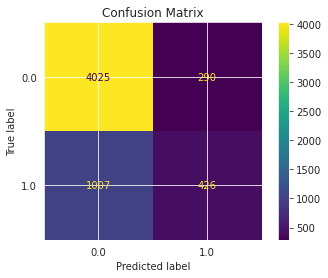

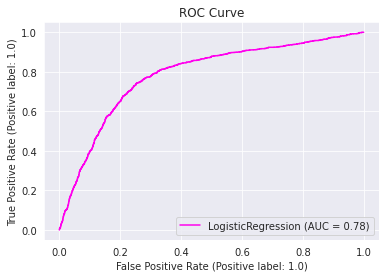

In [45]:
reglog()

Inicialmente, iremos focar nossas análises na matriz de confusão e na curva ROC de cada modelo; as demais métricas serão analisadas ao final, em conjunto.

Sobre a matriz de confusão, é válido ressaltarmos que temos poucos candidatos que não desejam trocar de emprego, mas que o modelo predizeu que sim, contabilizando 290. 

Para a nossa análise, o fator que mais interfere é a predição errada de um candidato que deseja trocar de emprego, mas foi inferido que não deseja, o que é levado em conta pela Revocação (ou *recall*, ou ainda sensitividade). Neste modelo, tivemos 1007 ocorrências, o que é um número grande; devido a isso, a Revocação foi baixa; devemos compará-la com as dos outros modelos ao fim para uma melhor análise.

Sobre a curva ROC, o valor do AUC é 0.78. Podemos compará-lo ao dos outros modelos posteriormente. Quanto mais próximo de 1 o valor, melhor o modelo. Por outro lado, quanto mais próximo de 0.5, pior o modelo.

## Árvore de Decisão

O próximo modelo a ser aplicado é a Árvore de Decisão.

Primeiramente, definiremos uma função para que possamos escolher a melhor profundidade máxima para a nossa árvore:

In [46]:
def max_depth_choice():
  max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]
  for item in max_depth:
    clf_model = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth = item, min_samples_leaf = 5)
    clf_model.fit(X_train,y_train)
    y_predict = clf_model.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    print(f'Acurácia {accuracy} - Max Depth {item}')

Podemos, então, verificar tal aplicação no modelo em questão:

In [47]:
max_depth_choice()

Acurácia 0.7835768963117606 - Max Depth 2
Acurácia 0.7840988169798191 - Max Depth 3
Acurácia 0.7842727905358385 - Max Depth 4
Acurácia 0.7818371607515657 - Max Depth 5
Acurácia 0.7766179540709812 - Max Depth 6
Acurácia 0.7773138482950591 - Max Depth 7
Acurácia 0.7760960334029228 - Max Depth 8
Acurácia 0.7762700069589422 - Max Depth 9
Acurácia 0.7727905358385525 - Max Depth 10


Definiremos, também, uma função para escolhermos o número mínimo de folhas para o nosso modelo criar uma nova amostra, levando em conta a profundidade que já determinamos ser a melhor, a de 4:

In [48]:
def min_samples_leaf(depth):
  min_samples_leaf = [2, 3, 4, 5, 6, 7, 8, 9, 10]
  for item in min_samples_leaf:
    clf_model = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth = depth, min_samples_leaf =item)
    clf_model.fit(X_train,y_train)
    y_predict = clf_model.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    print(f'Acurácia {accuracy} - Min Samples Leaf {item}'.format(accuracy, item))

Aplicaremos, então, esta função:

In [49]:
min_samples_leaf(4)

Acurácia 0.7842727905358385 - Min Samples Leaf 2
Acurácia 0.7842727905358385 - Min Samples Leaf 3
Acurácia 0.7842727905358385 - Min Samples Leaf 4
Acurácia 0.7842727905358385 - Min Samples Leaf 5
Acurácia 0.7842727905358385 - Min Samples Leaf 6
Acurácia 0.7842727905358385 - Min Samples Leaf 7
Acurácia 0.7820111343075853 - Min Samples Leaf 8
Acurácia 0.7820111343075853 - Min Samples Leaf 9
Acurácia 0.7820111343075853 - Min Samples Leaf 10


Percebemos que a maior acurácia ocorre com os valores de 2 a 7. Definiremos como 7 nosso valor, para que o modelo evite *overfitting*.

Em seguida, definiremos a função para o modelo, utilizando, primeiramente, o índice GINI como critério:

In [50]:
def decision_tree_gini(depth, leaf):
  clf_model = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth = depth, min_samples_leaf = leaf)
  clf_model.fit(X_train, y_train)
  y_predict = clf_model.predict(X_test)

  plt.figure(figsize=(20,15))
  plot_tree(clf_model, filled=True)

  #métricas
  plot_confusion_matrix(clf_model, X_test, y_test)
  plt.title('Confusion Matrix')

  plot_roc_curve(clf_model, X_test, y_test)
  plt.title('ROC Curve')

  tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

  print("Perfomance do modelo:")
  print("--------------------------------------")
  print(f'Acurácia: {accuracy_score(y_test,y_predict)}')

  print("--------------------------------------")
  print(f'Precisão: {tp/(tp+fp)}')

  print("--------------------------------------")
  print(f'Revocação: {tp/(tp+fn)}')

  print("--------------------------------------")
  print(f'F1-Score: {2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))}')
  print("--------------------------------------")
  print(classification_report(y_test, y_predict, zero_division = 0))

Aplicaremos, então, a função com os valores que encontramos previamente. 

Também será plotada a nossa árvore de decisão:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Perfomance do modelo:
--------------------------------------
Acurácia: 0.7842727905358385
--------------------------------------
Precisão: 0.5943304007820137
--------------------------------------
Revocação: 0.424284717376134
--------------------------------------
F1-Score: 0.495114006514658
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      4315
         1.0       0.59      0.42      0.50      1433

    accuracy                           0.78      5748
   macro avg       0.71      0.66      0.68      5748
weighted avg       0.77      0.78      0.77      5748



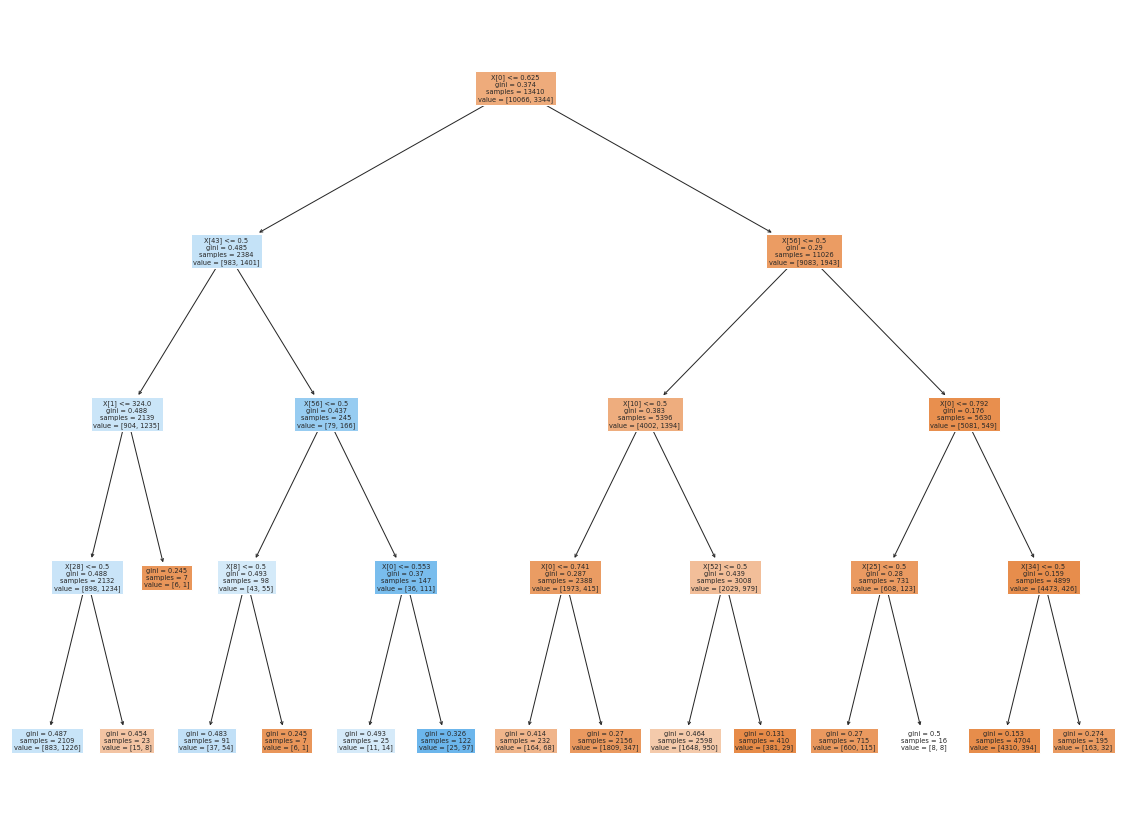

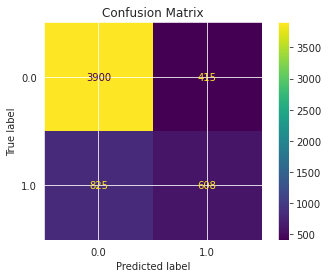

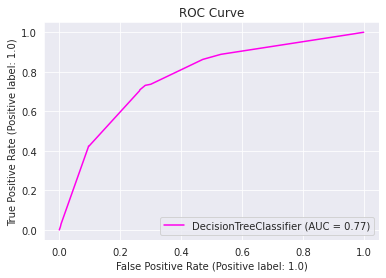

In [51]:
decision_tree_gini(4, 7)

Percebemos, então, que este modelo apresenta uma menor ocorrência de candidatos que querem trocar de emprego, mas foram classificados como não querendo do que a Regressão Logística. A Revocação também aumentou um pouco quando em comparação com este modelo,mas ainda também é baixa. O valor da AUC na curva ROC foi um pouco menor que o do modelo anterior, sendo 0.77.

Podemos, então, definir uma função que também cria uma árvore de decisão, mas seguindo o critério da Entropia:

In [52]:
def decision_tree_entropy(depth, leaf):
  clf_model = DecisionTreeClassifier(criterion = "entropy", random_state = 42, max_depth = depth, min_samples_leaf = leaf)
  clf_model.fit(X_train,y_train)
  y_predict = clf_model.predict(X_test)

  plt.figure(figsize=(20,15))
  plot_tree(clf_model, filled=True)


  #métricas
  plot_confusion_matrix(clf_model, X_test, y_test)
  plt.title('Confusion Matrix')

  plot_roc_curve(clf_model, X_test, y_test)
  plt.title('ROC Curve')

  tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

  print("Perfomance do modelo:")
  print("--------------------------------------")
  print(f'Acurácia: {accuracy_score(y_test,y_predict)}')
  acuracias.append(accuracy_score(y_test,y_predict))

  print("--------------------------------------")
  print(f'Precisão: {tp/(tp+fp)}')
  precisoes.append(tp/(tp+fp))

  print("--------------------------------------")
  print(f'Revocação: {tp/(tp+fn)}')
  revocacoes.append(tp/(tp+fn))

  print("--------------------------------------")
  print(f'F1-Score: {2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))}')
  f1_score.append(2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))
  print("--------------------------------------")
  print(classification_report(y_test, y_predict, zero_division = 0))

Aplicaremos-na, então:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Perfomance do modelo:
--------------------------------------
Acurácia: 0.7842727905358385
--------------------------------------
Precisão: 0.5943304007820137
--------------------------------------
Revocação: 0.424284717376134
--------------------------------------
F1-Score: 0.495114006514658
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      4315
         1.0       0.59      0.42      0.50      1433

    accuracy                           0.78      5748
   macro avg       0.71      0.66      0.68      5748
weighted avg       0.77      0.78      0.77      5748



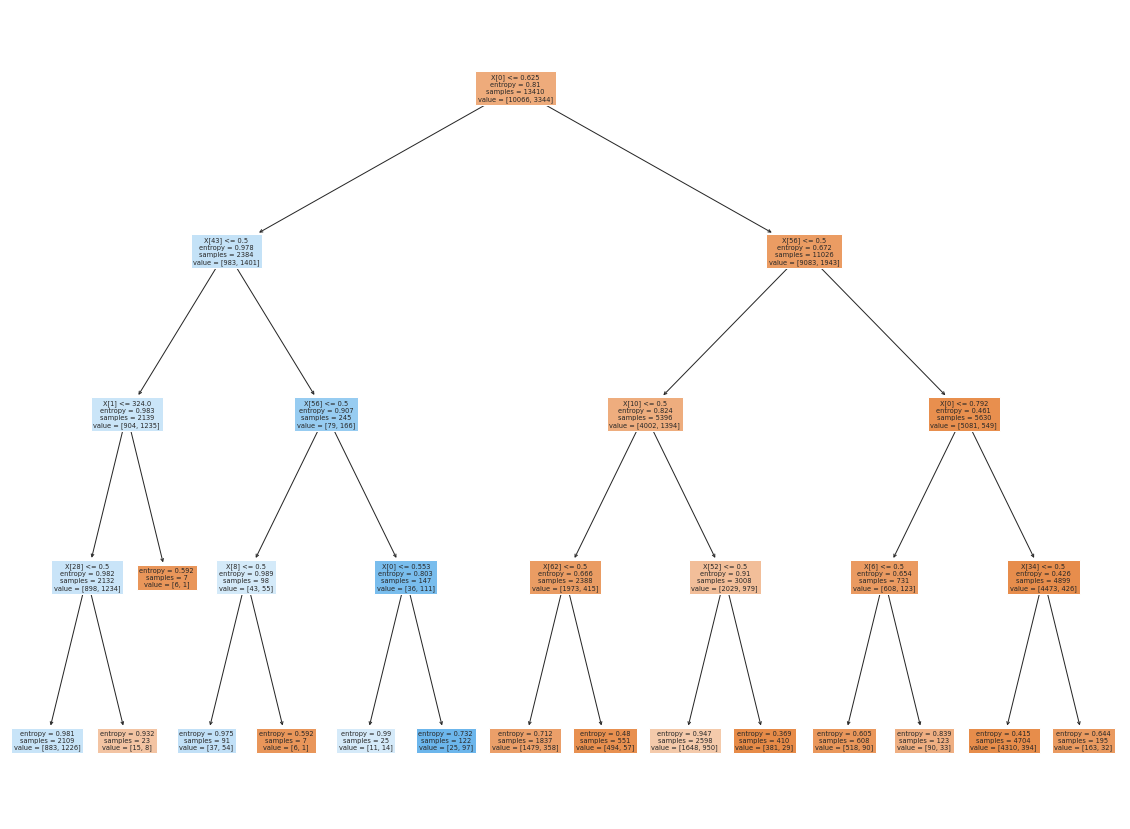

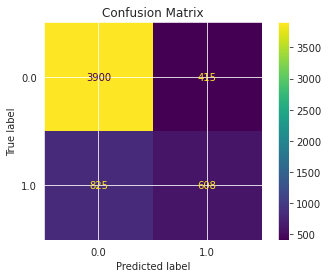

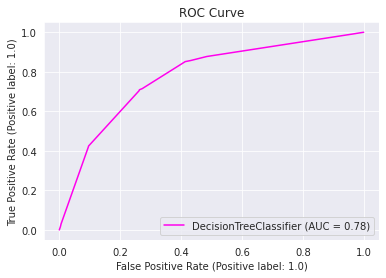

In [53]:
decision_tree_entropy(4, 7)

Percebemos que as métricas são as mesmas. No entanto, o valor da AUC na curva ROC foi um pouco maior do que com o critério Gini, por isso, quando utilizarmos os modelos em outras instâncias, utilizaremos a Entropia, por isso só seus valores foram adicionados às listas criadas anteriormente.

## Random Forest

Nosso próximo modelo será a Floresta Aleatória, mais conhecida como Random Forest.

Nossa primeira tarefa também será definir uma função para que a maior profundidade adequada seja encontrada:

In [54]:
def max_depth_rf():
  accuracies = []
  for item in range(1, 40):
    rf = RandomForestClassifier(max_depth = item, n_estimators = 200, min_samples_split = 50, criterion = 'entropy', oob_score = True, random_state = 42)
    rf.fit(X_train, y_train)
    predicted = rf.predict(X_test)
    accuracy = accuracy_score(y_test, predicted)
    accuracies.append(accuracy)
  plt.figure(figsize = (10,6))
  plt.plot(range(1, 40), accuracies, color = 'red')
  plt.ylabel('Accuracy')
  plt.xlabel('Max Depth')
  plt.title('Accuracy value per max depth')
  plt.show()

Em seguida, utilizaremos a função:

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

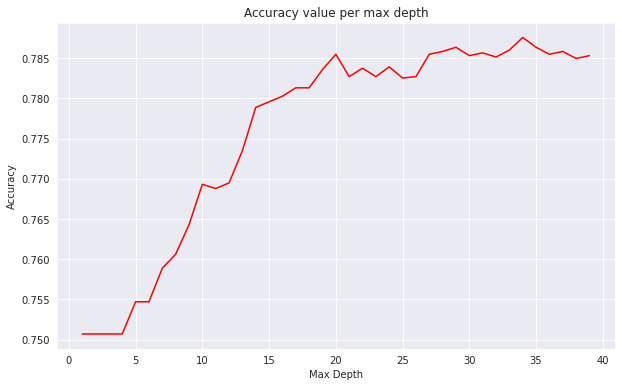

In [55]:
max_depth_rf()

Percebemos, então, que a profundidade adequada seria a de 34; no entanto, para que o modelo corra menos chance de sofrer *overfitting*, utilizaremos o valor de 20, que também indica uma boa acurácia.

Criaremos, então, uma função para a criação do modelo, baseada no valor da profundidade como parâmetro:

In [56]:
def random_forest(depth):
  rf = RandomForestClassifier(max_depth = depth, n_estimators = 200, min_samples_split = 50, criterion = 'entropy', oob_score = True, random_state = 42)
  rf.fit(X_train, y_train)
  y_predict = rf.predict(X_test)

  #métricas
  plot_confusion_matrix(rf, X_test, y_test)
  plt.title('Confusion Matrix')

  plot_roc_curve(rf, X_test, y_test)
  plt.title('ROC Curve')

  tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

  print("Perfomance do modelo:")
  print("--------------------------------------")
  print(f'Acurácia: {accuracy_score(y_test,y_predict)}')
  acuracias.append(accuracy_score(y_test,y_predict))

  print("--------------------------------------")
  print(f'Precisão: {tp/(tp+fp)}')
  precisoes.append(tp/(tp+fp))

  print("--------------------------------------")
  print(f'Revocação: {tp/(tp+fn)}')
  revocacoes.append(tp/(tp+fn))

  print("--------------------------------------")
  print(f'F1-Score: {2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))}')
  f1_score.append(2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))
  print("--------------------------------------")
  print(classification_report(y_test, y_predict, zero_division = 0))

Aplicaremos, então, o modelo:

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Perfomance do modelo:
--------------------------------------
Acurácia: 0.785490605427975
--------------------------------------
Precisão: 0.6057082452431289
--------------------------------------
Revocação: 0.39986043265875787
--------------------------------------
F1-Score: 0.4817150063051702
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      4315
         1.0       0.61      0.40      0.48      1433

    accuracy                           0.79      5748
   macro avg       0.71      0.66      0.67      5748
weighted avg       0.77      0.79      0.77      5748



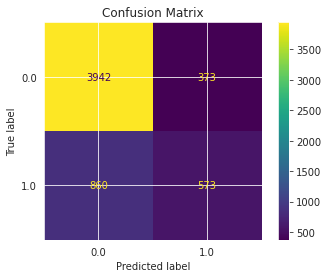

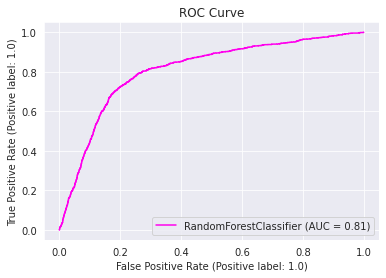

In [57]:
random_forest(20)

Percebemos que o modelo possui uma Revocação semelhante à do modelo anterior, mas um pouco menor, o que não o sugere como mais viável para nós. Mesmo assim, o valor da AUC na curva ROC foi superior, de 0.81.

## KNN

Nosso próximo modelo sera o KNN.

Primeiramente, definiremos uma função para a escolha de um K ideal:

In [58]:
def k_choice():
  k_range = range(1, 30)
  scores = {}
  scores_list = []
  for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    scores[k] = accuracy_score(y_test, y_predict)
    scores_list.append(accuracy_score(y_test, y_predict))
  plt.figure(figsize = (10,6))
  plt.plot(range(1, 30), scores_list, color = 'red')
  plt.ylabel('Accuracy')
  plt.xlabel('K')
  plt.title('Choice of ideal K')
  plt.show()

Aplicaremos, então, a função:

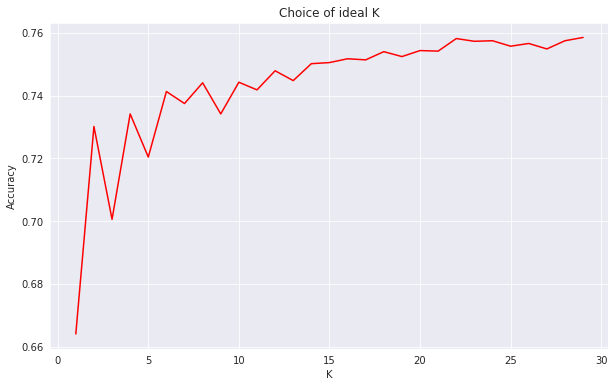

In [59]:
k_choice()

Percebemos, então, que o melhor K está localizado em 22. No entanto, como o valor é um pouco alto, o modelo corre chances de sofrer *underfitting*. Por isso, utilizaremos a validação cruzada para escolher o melhor K. Para isso, primeiramente, definiremos uma função:

In [60]:
def cross_val_knn():
  best_classifier = None
  best_score = 0.0
  best_k = 0
  k_range = [5, 10, 15, 20, 25, 30, 35]

  for k in k_range:
      knn = KNeighborsClassifier(k)
      score = np.mean(cross_val_score(knn, X_train, y_train, cv = 10))
      
      print(f"Finished for K = {k} | Score: {score:.4f}")
      if score > best_score:
          best_k = k
          best_score = score
          best_classifier = knn

  print("========================================")
  print(f"Best acc: {best_score:.4f} | K = {best_k}")

Testaremos a função, então:

In [61]:
cross_val_knn()

Finished for K = 5 | Score: 0.7219
Finished for K = 10 | Score: 0.7424
Finished for K = 15 | Score: 0.7461
Finished for K = 20 | Score: 0.7491
Finished for K = 25 | Score: 0.7475
Finished for K = 30 | Score: 0.7501
Finished for K = 35 | Score: 0.7500
Best acc: 0.7501 | K = 30


Percebemos que o melhor K está próximo próximo a 30, mesmo assim, percebemos que os valor dos Scores são bem próximos, então voltaremos ao gráfico e podemos verificar que o valor de K = 6 também possui boa acurácia, então o utilizaremos.  

Definiremos, então, a função para a aplicação do modelo:

In [62]:
def knn(k):
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)

  #métricas
  plot_confusion_matrix(model, X_test, y_test)
  plt.title('Confusion Matrix')

  plot_roc_curve(model, X_test, y_test)
  plt.title('ROC Curve')

  tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

  print("Perfomance do modelo:")
  print("--------------------------------------")
  print(f'Acurácia: {accuracy_score(y_test,y_predict)}')
  acuracias.append(accuracy_score(y_test,y_predict))

  print("--------------------------------------")
  print(f'Precisão: {tp/(tp+fp)}')
  precisoes.append(tp/(tp+fp))

  print("--------------------------------------")
  print(f'Revocação: {tp/(tp+fn)}')
  revocacoes.append(tp/(tp+fn))

  print("--------------------------------------")
  print(f'F1-Score: {2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))}')
  f1_score.append(2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))
  print("--------------------------------------")
  print(classification_report(y_test, y_predict, zero_division = 0))

Aplicaremos, então, o KNN com o valor de K como 22:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Perfomance do modelo:
--------------------------------------
Acurácia: 0.7413013221990258
--------------------------------------
Precisão: 0.44534412955465585
--------------------------------------
Revocação: 0.15352407536636428
--------------------------------------
F1-Score: 0.22833419823559942
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.77      0.94      0.84      4315
         1.0       0.45      0.15      0.23      1433

    accuracy                           0.74      5748
   macro avg       0.61      0.55      0.54      5748
weighted avg       0.69      0.74      0.69      5748



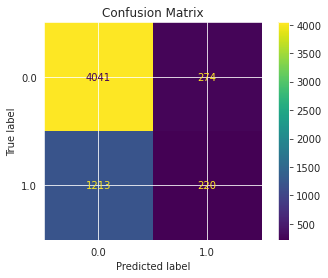

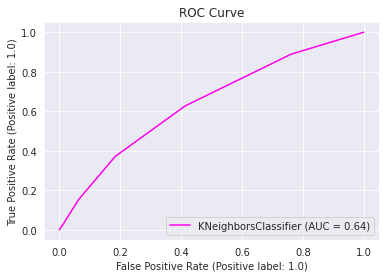

In [63]:
knn(6)

Percebemos, então, que o número de candidatos que desejam trocar de emprego, mas foram classificados como não querendo foi alto, de 1150, o que abaixou muito a Revocação do modelo, quando em comparação aos anteriores. Isso caracteriza *underfitting*, pois o modelo classificou quase todos os casos como negativos. Vale ressaltar que o valor da AUC na curva ROC também foi baixíssimo, de 0.64.

## Naive Bayes

O modelo a ser apliado em seguida é o Naive Bayes.

Para isso, como já havíamos fazendo, definiremos a função para o modelo primeiramente:

In [64]:
def naivebayes():
  model = GaussianNB()
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)

  #métricas
  plot_confusion_matrix(model, X_test, y_test)
  plt.title('Confusion Matrix')

  plot_roc_curve(model, X_test, y_test)
  plt.title('ROC Curve')

  tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

  print("Perfomance do modelo:")
  print("--------------------------------------")
  print(f'Acurácia: {accuracy_score(y_test,y_predict)}')
  acuracias.append(accuracy_score(y_test,y_predict))

  print("--------------------------------------")
  print(f'Precisão: {tp/(tp+fp)}')
  precisoes.append(tp/(tp+fp))

  print("--------------------------------------")
  print(f'Revocação: {tp/(tp+fn)}')
  revocacoes.append(tp/(tp+fn))

  print("--------------------------------------")
  print(f'F1-Score: {2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))}')
  f1_score.append(2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))
  print("--------------------------------------")
  print(classification_report(y_test, y_predict, zero_division = 0))

Em seguida, aplicaremos-no:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Perfomance do modelo:
--------------------------------------
Acurácia: 0.6443980514961726
--------------------------------------
Precisão: 0.37402061855670105
--------------------------------------
Revocação: 0.6329378925331473
--------------------------------------
F1-Score: 0.47019180922757914
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.65      0.73      4315
         1.0       0.37      0.63      0.47      1433

    accuracy                           0.64      5748
   macro avg       0.61      0.64      0.60      5748
weighted avg       0.73      0.64      0.67      5748



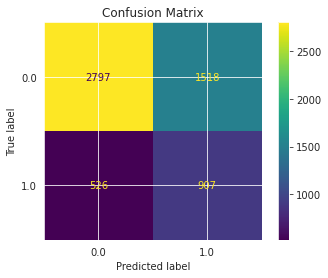

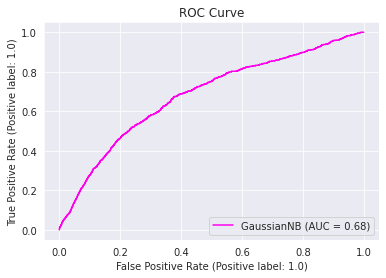

In [65]:
naivebayes()

Percebemos que, até então, a Revocação do modelo foi a maior, ou seja, o modelo classificou mais corretamente os candidatos que desejam trocar de emprego. Em comparação, a Precisão do modelo não foi alta, o que indica que, dos casos realmente positivos, não foi acertada uma quantidade alta. O valor da AUC na curva ROC também não foi ideal, sendo 0.68.

## SVM

Nosso último modelo será o Support Vector Machine, mais conhecido como SVM.

Primeiro, criaremos uma função para sua aplicação:

In [66]:
def svm():
  svm_model = SVC(C = 1.0, probability=True)
  svm_model.fit(X_train, y_train)
  y_predict = svm_model.predict(X_test)

  #métricas
  plot_confusion_matrix(svm_model, X_test, y_test)
  plt.title('Confusion Matrix')

  plot_roc_curve(svm_model, X_test, y_test)
  plt.title('ROC Curve')

  tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

  print("Perfomance do modelo:")
  print("--------------------------------------")
  print(f'Acurácia: {accuracy_score(y_test,y_predict)}')
  acuracias.append(accuracy_score(y_test,y_predict))

  print("--------------------------------------")
  print(f'Precisão: {tp/(tp+fp)}')
  precisoes.append(tp/(tp+fp))

  print("--------------------------------------")
  print(f'Revocação: {tp/(tp+fn)}')
  revocacoes.append(tp/(tp+fn))

  print("--------------------------------------")
  print(f'F1-Score: {2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))}')
  f1_score.append(2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))
  print("--------------------------------------")  
  print(classification_report(y_test, y_predict, zero_division = 0))

Agora, iremos utilizá-la:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Perfomance do modelo:
--------------------------------------
Acurácia: 0.7506958942240779
--------------------------------------
Precisão: nan
--------------------------------------
Revocação: 0.0
--------------------------------------
F1-Score: nan
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      4315
         1.0       0.00      0.00      0.00      1433

    accuracy                           0.75      5748
   macro avg       0.38      0.50      0.43      5748
weighted avg       0.56      0.75      0.64      5748



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in long_scalars


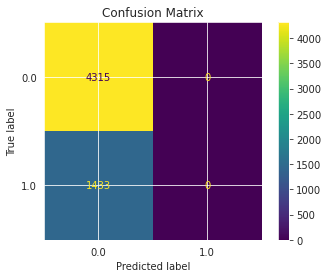

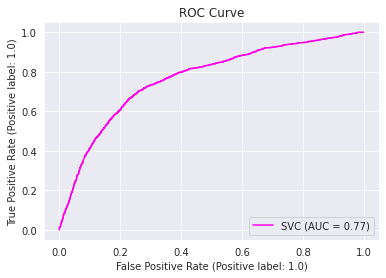

In [67]:
svm()

Percebemos que o modelo só classificou candidatos como negativos, o que zerou a Revocação e, portanto, caracteriza o *underfitting*. Mesmo assim, como esses candidatos são numerosos, o valor da AUC na curva ROC foi 0.77.

# 7.2 Predições - Sem dados faltantes

Como os valores das métricas não foram tão ideais, podemos tratar os dados de outra forma, excluindo todas suas ocorrências. Em seguida, testaremos todos os modelos só chamando as funções que já definimos, para que possamos analisar as métricas.

## Atribuições iniciais

In [68]:
df_clean = df.dropna() #limpando os dados faltantes
df_numeric_clean = pd.get_dummies(data = df_clean) #transformando os dados categóricos em valores de 0 e 1

In [69]:
X = df_numeric_clean.drop('target', axis = 1) 
y = df_numeric_clean['target']
#separando o novo dataset em teste e treino:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

## Regressão Logística

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_

Perfomance do modelo:
--------------------------------------
Acurácia: 0.8414588760699665
--------------------------------------
Precisão: 0.5637583892617449
--------------------------------------
Revocação: 0.18876404494382024
--------------------------------------
F1-Score: 0.2828282828282828
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      2242
         1.0       0.56      0.19      0.28       445

    accuracy                           0.84      2687
   macro avg       0.71      0.58      0.60      2687
weighted avg       0.81      0.84      0.81      2687



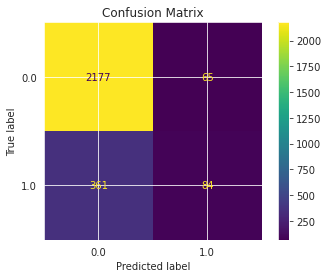

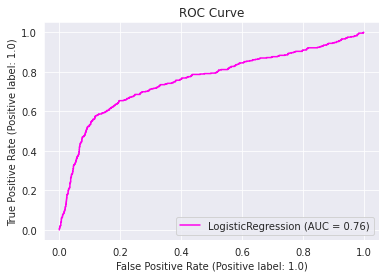

In [70]:
reglog()

Percebemos que a Revocação é menor quando comparada à Regressão Logística feita com os dados faltantes. Isso ocorre porque alguns valores apagados provavelmente eram corretamente classificados anteriormente, o que aumentava o número dessa métrica. O valor da AUC na curva ROC foi de 0.76, um pouco menor do que a primeira Regressão Logística feita.

## Árvore de Decisão

In [71]:
max_depth_choice()

Acurácia 0.8585783401563082 - Max Depth 2
Acurácia 0.8563453665798288 - Max Depth 3
Acurácia 0.8578340156308151 - Max Depth 4
Acurácia 0.8578340156308151 - Max Depth 5
Acurácia 0.8556010420543357 - Max Depth 6
Acurácia 0.8526237439523632 - Max Depth 7
Acurácia 0.8507629326386305 - Max Depth 8
Acurácia 0.8429475251209527 - Max Depth 9
Acurácia 0.8429475251209527 - Max Depth 10


Percebemos, então, que a melhor escolha para a maior profundidade pode ser de 4 ou 5. Optaremos por 5 para a possível construção de um melhor modelo:

In [72]:
min_samples_leaf(5)

Acurácia 0.8589505024190547 - Min Samples Leaf 2
Acurácia 0.8593226646818013 - Min Samples Leaf 3
Acurácia 0.8585783401563082 - Min Samples Leaf 4
Acurácia 0.8578340156308151 - Min Samples Leaf 5
Acurácia 0.8548567175288426 - Min Samples Leaf 6
Acurácia 0.8552288797915891 - Min Samples Leaf 7
Acurácia 0.8552288797915891 - Min Samples Leaf 8
Acurácia 0.8556010420543357 - Min Samples Leaf 9
Acurácia 0.8556010420543357 - Min Samples Leaf 10


Percebemos que o menor valor de acordo com essa função é de 3, então usaremos ele para a construção do nosso modelo, seguindo o critério da Entropia:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Perfomance do modelo:
--------------------------------------
Acurácia: 0.8593226646818013
--------------------------------------
Precisão: 0.5852417302798982
--------------------------------------
Revocação: 0.5168539325842697
--------------------------------------
F1-Score: 0.5489260143198091
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      2242
         1.0       0.59      0.52      0.55       445

    accuracy                           0.86      2687
   macro avg       0.75      0.72      0.73      2687
weighted avg       0.85      0.86      0.86      2687



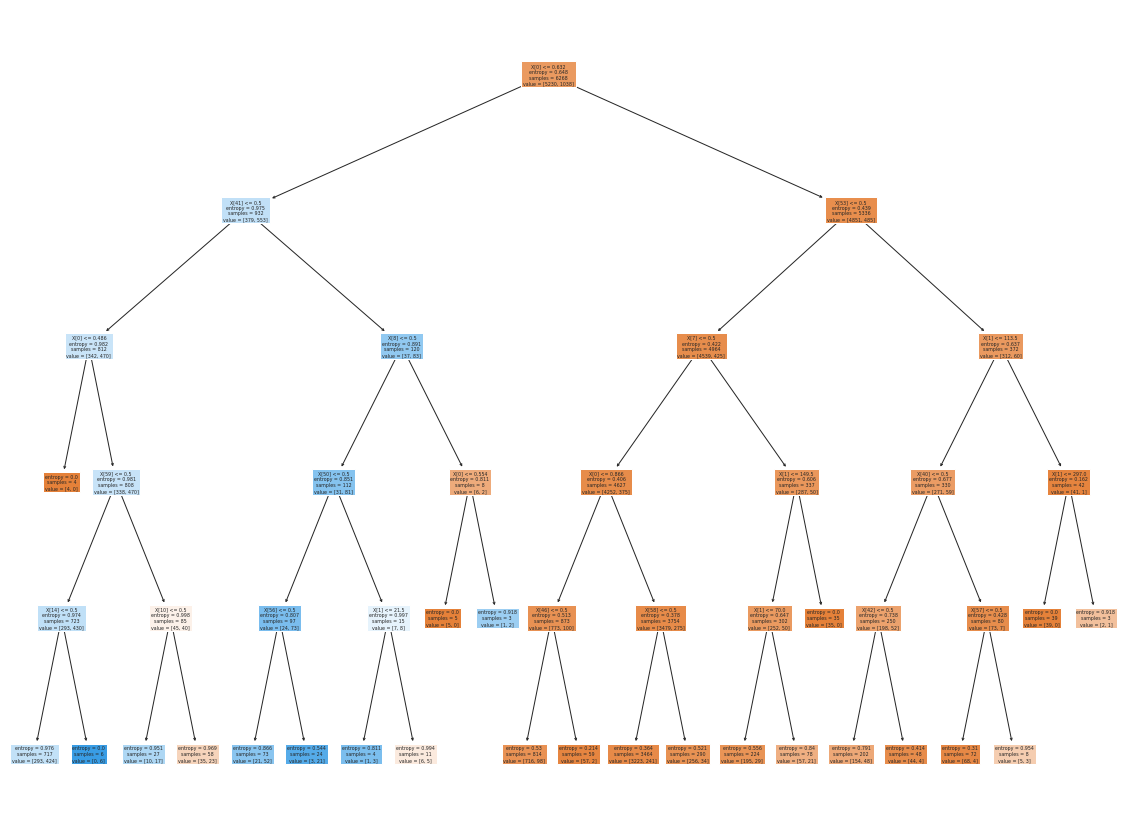

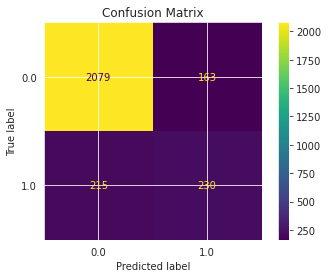

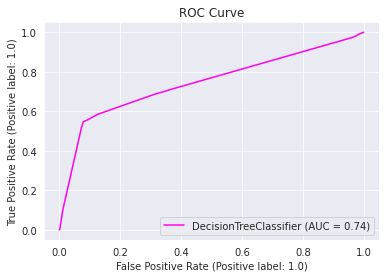

In [73]:
decision_tree_entropy(5, 3)

Percebemos, então, que a Revocação ainda continua baixa neste modelo, o que, provavelmente, deve-se ao mesmo motivo da baixa Precisão da Regressão Logística que acabamos de fazer. No entanto, o valor é maior quando posto em comparação às arvores de decisão feitas com os dados faltantes.

O valor da AUC na curva ROC foi de 0.74, um pouco menor também do que na primeira Árvore de Decisão feita.

## Random Forest

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

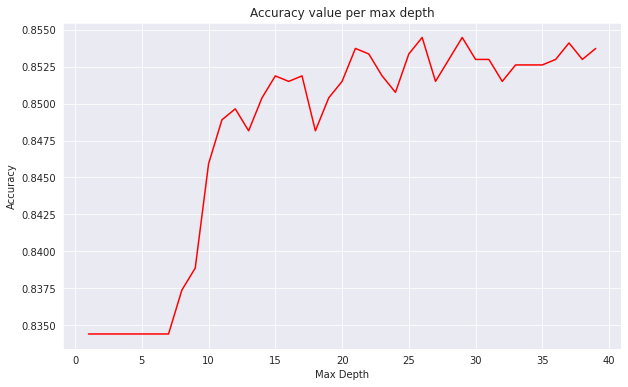

In [74]:
max_depth_rf()

Podemos ver que a melhor profundidade máxima para a nossa Random Forest é de 26, então a utilizaremos para a construção do modelo:

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Perfomance do modelo:
--------------------------------------
Acurácia: 0.854484555266096
--------------------------------------
Precisão: 0.593103448275862
--------------------------------------
Revocação: 0.3865168539325843
--------------------------------------
F1-Score: 0.46802721088435373
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      2242
         1.0       0.59      0.39      0.47       445

    accuracy                           0.85      2687
   macro avg       0.74      0.67      0.69      2687
weighted avg       0.84      0.85      0.84      2687



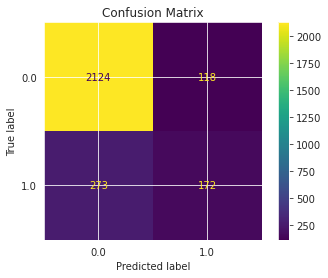

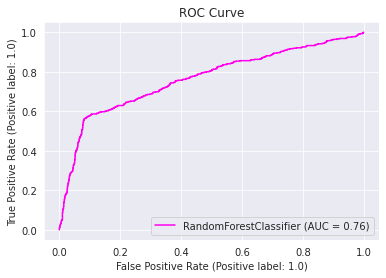

In [75]:
random_forest(26)

É possível concluir que a Revocação é um pouco menor do que quando havia dados faltantes; novamente, pelo mesmo motivo dos modelos anteriores. Também é um pouco menor o valor da AUC na curva ROC, de 0.76.

## KNN

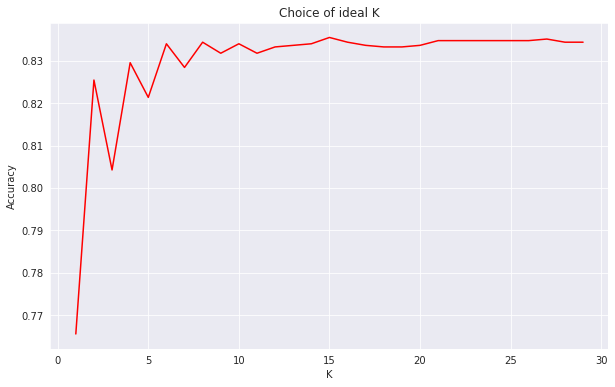

In [76]:
k_choice()

In [77]:
cross_val_knn()

Finished for K = 5 | Score: 0.8221
Finished for K = 10 | Score: 0.8330
Finished for K = 15 | Score: 0.8342
Finished for K = 20 | Score: 0.8341
Finished for K = 25 | Score: 0.8341
Finished for K = 30 | Score: 0.8346
Finished for K = 35 | Score: 0.8347
Best acc: 0.8347 | K = 35


Com o valor de K sendo 35, a chance do modelo overfittar é alta. Como a diferença entre as acurácias é pequena, podemos escolher o valor de 8, em que K possui uma ótima acurácia também:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Perfomance do modelo:
--------------------------------------
Acurácia: 0.8343877930777819
--------------------------------------
Precisão: 0.5
--------------------------------------
Revocação: 0.017977528089887642
--------------------------------------
F1-Score: 0.034707158351409986
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      2242
         1.0       0.50      0.02      0.03       445

    accuracy                           0.83      2687
   macro avg       0.67      0.51      0.47      2687
weighted avg       0.78      0.83      0.76      2687



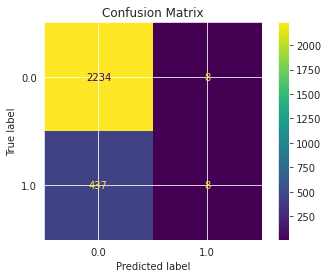

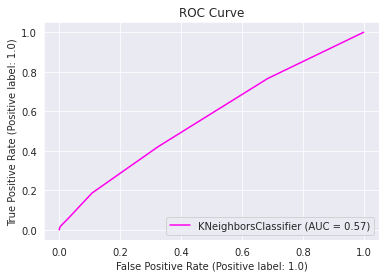

In [78]:
knn(8)

O valor da Revocação do KNN já era baixo, mas, com muitos dados apagados, o modelo classificou quase todos os casos como negativos, o que simboliza o *underfitting*, o que deixou a Revocação baixíssima, por mais que a acurácia esteja alta, o que invalida o modelo neste caso. Ressaltamos também que o valor da AUC na curva ROC também é muito ruim, de 0.57.

## Naive Bayes

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Perfomance do modelo:
--------------------------------------
Acurácia: 0.6844064011909192
--------------------------------------
Precisão: 0.29075804776739356
--------------------------------------
Revocação: 0.6292134831460674
--------------------------------------
F1-Score: 0.3977272727272727
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.70      0.79      2242
         1.0       0.29      0.63      0.40       445

    accuracy                           0.68      2687
   macro avg       0.60      0.66      0.59      2687
weighted avg       0.80      0.68      0.72      2687



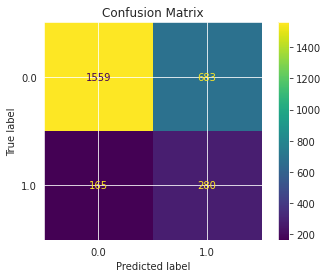

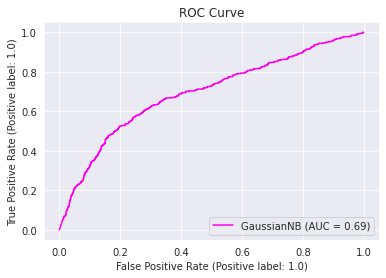

In [79]:
naivebayes()

O valor da Revocação deste modelo foi um pouco menor do que o primeiro Naive Bayes que fizemos. Por outro lado, o valor da AUC na curva ROC subiu bem pouco, tornando-se 0.69.

## SVM

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Perfomance do modelo:
--------------------------------------
Acurácia: 0.8343877930777819
--------------------------------------
Precisão: nan
--------------------------------------
Revocação: 0.0
--------------------------------------
F1-Score: nan
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      2242
         1.0       0.00      0.00      0.00       445

    accuracy                           0.83      2687
   macro avg       0.42      0.50      0.45      2687
weighted avg       0.70      0.83      0.76      2687



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in long_scalars


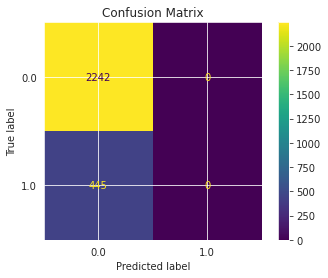

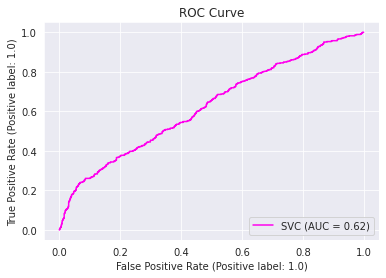

In [80]:
svm()

Por mais que a Acurácia tenha sido maior que anteriormente, o modelo ainda sofre *underfitting*, pois ignora classificar os candidatos que desejam trocar de emprego. Devido a isso, o valor da AUC na curva ROC abaixou, tornando-se 0.62.

# 7.3 Predições - Substituindo os dados faltantes

Por fim, podemos tentar uma terceira via para tratar os dados faltantes: olhando cada feature e tratando-as da melhor forma possível.

## Limpeza dos dados

Como visto, em 'gender', a quantidade de valores faltantes é grande quando em comparação às outras features; além disso, a grande maioria dos dados diz respeito à 'Male'. Devido a isso, se substituírmos os valores faltantes por este valor, a chance de erro é menor:

In [81]:
df['gender'].fillna('Male',inplace = True)

Em 'enrolled_university', 'education_level', 'experience' e 'last_new_job', há poucos valores faltantes, quando em comparação às demais features, portanto apagaremos estes dados.

In [82]:
df.dropna(subset = ['enrolled_university'], inplace = True)

In [83]:
df.dropna(subset = ['education_level'], inplace = True)

In [84]:
df.dropna(subset = ['experience'], inplace = True)

In [85]:
df.dropna(subset = ['last_new_job'], inplace = True)

Em 'major_discipline', assim como em 'gender', há muitos valores faltantes e a grande maioria dos dados existentes é 'STEM', portanto classificaremos os NaN com este valor:

In [86]:
df['major_discipline'].fillna('STEM',inplace = True)

Em 'company_type', há muitos dados faltantes, mas também muitos dados não-faltantes. Devido a isso, substituiremos os dados que faltam por 'missing_values':

In [87]:
df['company_type'].fillna('missing_value',inplace = True)

Em 'company_size', há mais dados faltantes do que os dados de alguns valores da feature, então apagaremos a feature toda:

In [88]:
df.drop('company_size', axis=1, inplace=True)

## Atribuições iniciais

In [89]:
df_numeric_clean2 = pd.get_dummies(data = df) #transformando os valores categóricos em 0 ou 1

In [90]:
X = df_numeric_clean2.drop('target', axis = 1) 
y = df_numeric_clean2['target']
#separando o novo dataset em teste e treino:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)

## Regressão Logística

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_

Perfomance do modelo:
--------------------------------------
Acurácia: 0.769472710453284
--------------------------------------
Precisão: 0.5735294117647058
--------------------------------------
Revocação: 0.23529411764705882
--------------------------------------
F1-Score: 0.33368983957219245
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86      4079
         1.0       0.57      0.24      0.33      1326

    accuracy                           0.77      5405
   macro avg       0.68      0.59      0.60      5405
weighted avg       0.74      0.77      0.73      5405



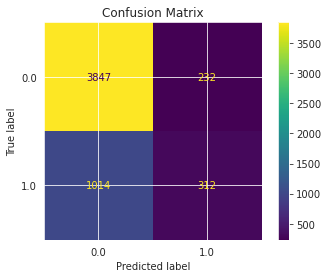

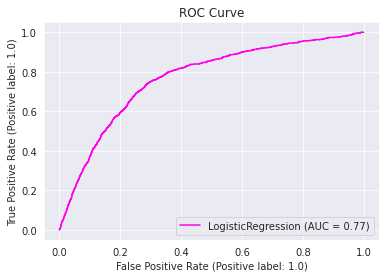

In [91]:
reglog()

Percebemos que a Revocação ainda se manteve baixa neste modelo. O valor da AUC na curva ROC ainda continua maior na primeira Regressão Logística feita.

## Árvore de Decisão

In [92]:
max_depth_choice()

Acurácia 0.7846438482886217 - Max Depth 2
Acurácia 0.7844588344125809 - Max Depth 3
Acurácia 0.7855689176688252 - Max Depth 4
Acurácia 0.7872340425531915 - Max Depth 5
Acurácia 0.7874190564292322 - Max Depth 6
Acurácia 0.7864939870490287 - Max Depth 7
Acurácia 0.7822386679000926 - Max Depth 8
Acurácia 0.7803885291396855 - Max Depth 9
Acurácia 0.7753931544865865 - Max Depth 10


A melhor profundidade máxima é 6, então a usaremos:

In [93]:
min_samples_leaf(6)

Acurácia 0.7877890841813135 - Min Samples Leaf 2
Acurácia 0.7870490286771508 - Min Samples Leaf 3
Acurácia 0.7868640148011101 - Min Samples Leaf 4
Acurácia 0.7874190564292322 - Min Samples Leaf 5
Acurácia 0.7870490286771508 - Min Samples Leaf 6
Acurácia 0.7874190564292322 - Min Samples Leaf 7
Acurácia 0.7874190564292322 - Min Samples Leaf 8
Acurácia 0.7874190564292322 - Min Samples Leaf 9
Acurácia 0.7874190564292322 - Min Samples Leaf 10


O melhor valor para esse parâmetro é 2, mas isso deixaria nosso modelo mais propício ao *overfitting*, então escolheremos o valor de 5:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Perfomance do modelo:
--------------------------------------
Acurácia: 0.7874190564292322
--------------------------------------
Precisão: 0.5593561368209256
--------------------------------------
Revocação: 0.6289592760180995
--------------------------------------
F1-Score: 0.5921192758253462
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86      4079
         1.0       0.56      0.63      0.59      1326

    accuracy                           0.79      5405
   macro avg       0.72      0.73      0.72      5405
weighted avg       0.80      0.79      0.79      5405



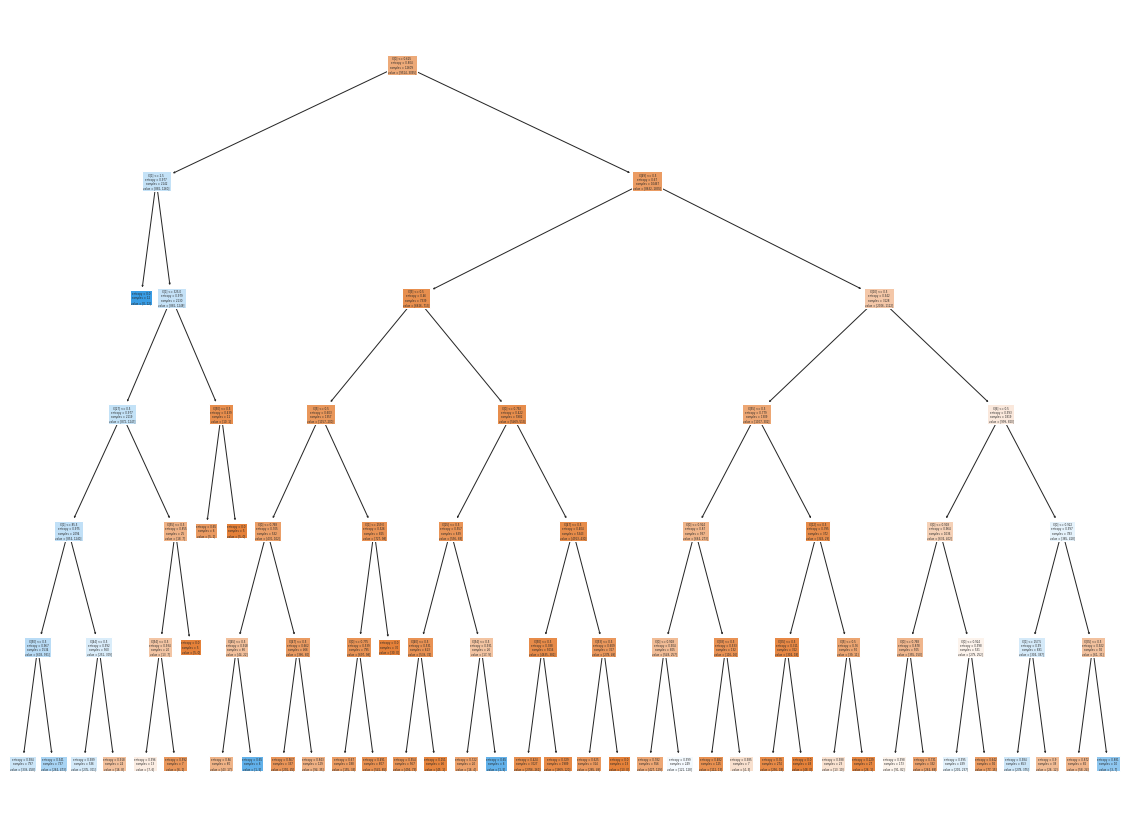

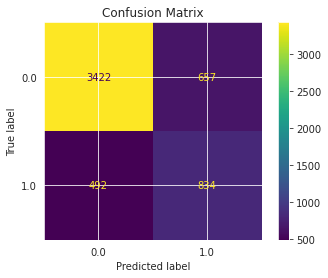

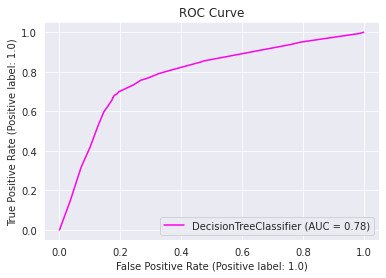

In [94]:
decision_tree_entropy(6,5)

Percebemos que, até então, a Revocação do modelo foi a maior. O valor da AUC na curva ROC manteve-se em relação à primeira Árvore de Decisão com critério de Entropia feita.

## Random Forest

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

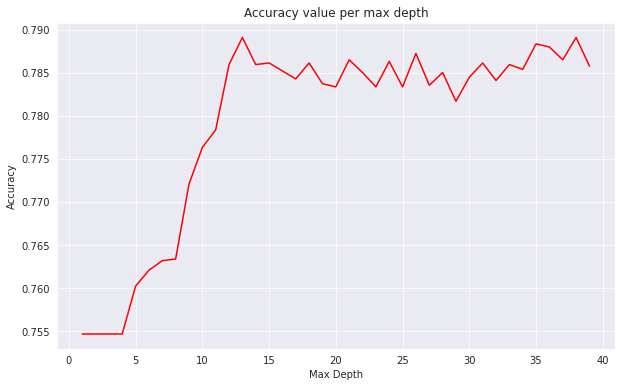

In [95]:
max_depth_rf()

Percebemos que a melhor profundidade máxima é 13, então a usaremos:

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Perfomance do modelo:
--------------------------------------
Acurácia: 0.7890841813135985
--------------------------------------
Precisão: 0.6131386861313869
--------------------------------------
Revocação: 0.38009049773755654
--------------------------------------
F1-Score: 0.4692737430167597
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      4079
         1.0       0.61      0.38      0.47      1326

    accuracy                           0.79      5405
   macro avg       0.72      0.65      0.67      5405
weighted avg       0.77      0.79      0.77      5405



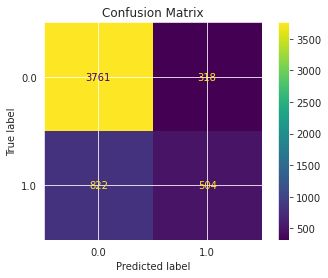

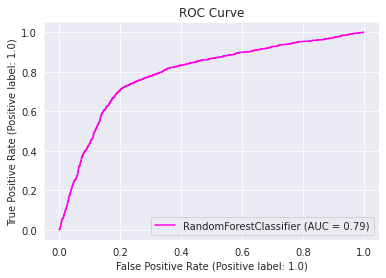

In [96]:
random_forest(13)

A Revocação deste modelo também se manteve baixa. O valor da AUC na curva ROC é um pouco menor do que a primeira Random Forest feita também.

## KNN

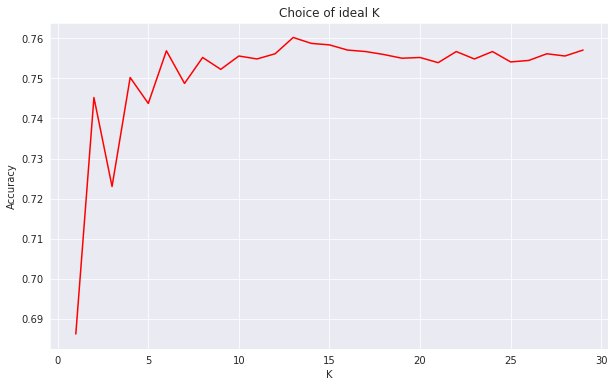

In [97]:
k_choice()

In [98]:
cross_val_knn()

Finished for K = 5 | Score: 0.7307
Finished for K = 10 | Score: 0.7532
Finished for K = 15 | Score: 0.7524
Finished for K = 20 | Score: 0.7530
Finished for K = 25 | Score: 0.7556
Finished for K = 30 | Score: 0.7553
Finished for K = 35 | Score: 0.7541
Best acc: 0.7556 | K = 25


Com o valor de 25, a chance do modelo sofrer *underfitting* seria alta, então utilizaremos o valor de 13, que possui boa acurácia no gráfico:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Perfomance do modelo:
--------------------------------------
Acurácia: 0.7602220166512489
--------------------------------------
Precisão: 0.5405405405405406
--------------------------------------
Revocação: 0.15082956259426847
--------------------------------------
F1-Score: 0.23584905660377356
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86      4079
         1.0       0.54      0.15      0.24      1326

    accuracy                           0.76      5405
   macro avg       0.66      0.55      0.55      5405
weighted avg       0.72      0.76      0.71      5405



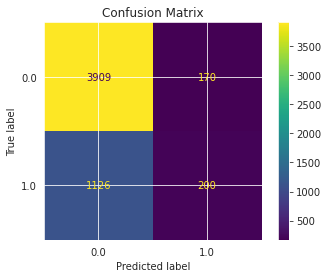

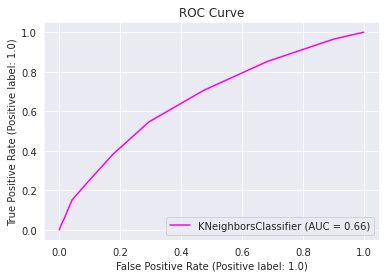

In [99]:
knn(13)

Assim como todos os outros KNN que fizemos, este também sofreu *underfitting*, então a Revocação foi baixíssima, por mais que a Acurácia esteja em um valor aceitável. 

O valor da AUC na curva ROC foi o maior dos modelos de KNN, de 0.66, mas ainda continua baixo.

## Naive Bayes

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Perfomance do modelo:
--------------------------------------
Acurácia: 0.6381128584643848
--------------------------------------
Precisão: 0.36328125
--------------------------------------
Revocação: 0.6312217194570136
--------------------------------------
F1-Score: 0.4611570247933884
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.64      0.73      4079
         1.0       0.36      0.63      0.46      1326

    accuracy                           0.64      5405
   macro avg       0.60      0.64      0.59      5405
weighted avg       0.72      0.64      0.66      5405



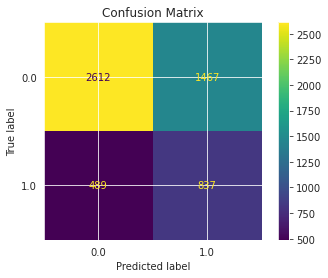

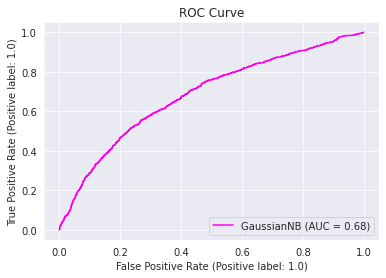

In [100]:
naivebayes()

A Revocação do Naive Bayes com os dados substituídos foi a maior de todos os modelos construídos, por mais que a Acurácia não tenha sido a melhor.

O valor da AUC na curva ROC manteve-se em relação ao primeiro modelo de Naive Bayes feito aqui.

## SVM

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Perfomance do modelo:
--------------------------------------
Acurácia: 0.7546716003700278
--------------------------------------
Precisão: nan
--------------------------------------
Revocação: 0.0
--------------------------------------
F1-Score: nan
--------------------------------------
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      4079
         1.0       0.00      0.00      0.00      1326

    accuracy                           0.75      5405
   macro avg       0.38      0.50      0.43      5405
weighted avg       0.57      0.75      0.65      5405



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in long_scalars


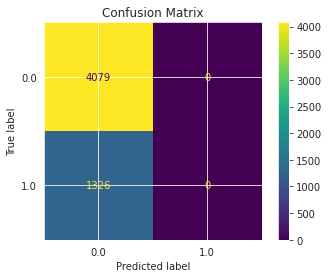

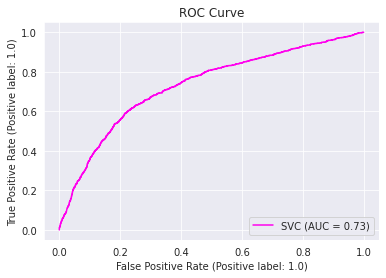

In [101]:
svm()

Percebemos que, assim como nos outros casos, este modelo continua sofrendo *underfitting*, já que ignora classificar os candidatos que desejam trocar de emprego. Junto a isso, o valor da AUC na curva ROC também diminuiu um pouco quando comparada ao primeiro modelo de SVM aqui feito. 

# 8. Métricas

Iremos, então, comparar as métricas de todos os modelos que fizemos.

Para isso, primeiramente, iremos criar um dataframe com as listas que criamos anteriormente e adicionamos os valores das métricas:

In [102]:
metricas = pd.DataFrame(list(zip(dados_faltantes, modelos, acuracias, precisoes, revocacoes, f1_score)), columns = ['Dados faltantes?', 'Modelo', 'Acurácia', 'Precisão', 'Revocação', 'F1-Score'])

Podemos, então, ver a cara do nosso dataset de métricas:

In [103]:
metricas.head()

,Dados faltantes?,Modelo,Acurácia,Precisão,Revocação,F1-Score
0,com,Regressão Logística,0.774356,0.594972,0.297278,0.396463
1,com,Árvore de Decisão,0.784273,0.594330,0.424285,0.495114
2,com,Random Forest,0.785491,0.605708,0.399860,0.481715
3,com,KNN,0.741301,0.445344,0.153524,0.228334
4,com,Naive Bayes,0.644398,0.374021,0.632938,0.470192


Primeiramente, iremos plotar o valor das Acurácias:

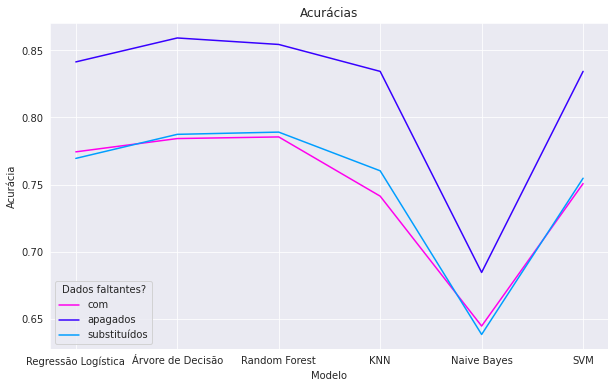

In [104]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Modelo', y = 'Acurácia', hue = 'Dados faltantes?', data = metricas)
plt.ylabel('Acurácia')
plt.xlabel('Modelo')
plt.title('Acurácias')
plt.show()

Conseguimos, então, perceber que os modelos com os dados apagados possuem maior acurácia, dando destaque à Arvore de Decisão e ao Random Forest.

Os modelos com dados faltantes e com dados substituídos possuíram acurácias semelhantes. 

No geral, os modelos de Naive Bayes possuíram Acurácias baixas, quando em comparação aos demais modelos.

Iremos ver, então, as Precisões:

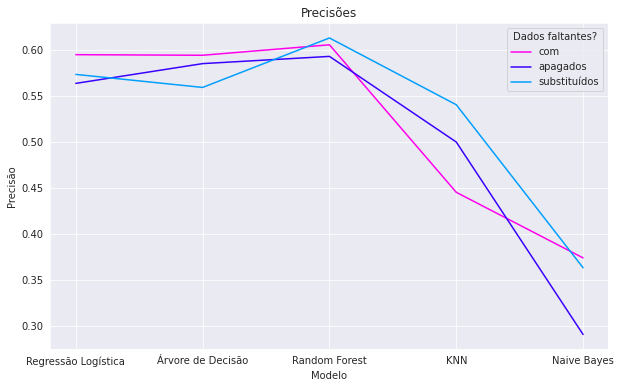

In [105]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Modelo', y = 'Precisão', hue = 'Dados faltantes?', data = metricas)
plt.ylabel('Precisão')
plt.xlabel('Modelo')
plt.title('Precisões')
plt.show()

Novamente, os modelos de Naive Bayes possuíram as métricas mais baixas novamente. O maior valor para cada forma de lidar com os dados esteve com o modelo Random Forest, com especial destaque ao modelo construído com os dados substituídos. Os modelos de SVM não estão no gráfico, pois as Precisões não foram possíveis de ser calculadas, graças ao *underfitting*.

Podemos ver, então, as Revocações:

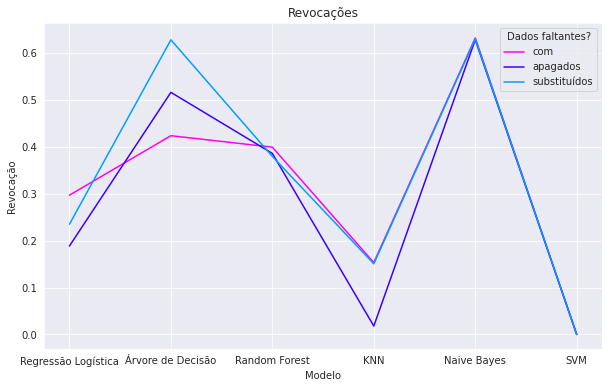

In [106]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Modelo', y = 'Revocação', hue = 'Dados faltantes?', data = metricas)
plt.ylabel('Revocação')
plt.xlabel('Modelo')
plt.title('Revocações')
plt.show()

Ao contrário das outras métricas, neste caso, os maiores valores estiveram com os modelos de Naive Bayes; ao mesmo tempo, os modelos de Árvore de Decisão também tiveram valores maiores do que os demais modelos.

Os modelos de KNN e SVM sofreram *underfitting*, pois os valores das Revocações foram baixíssimos (os do segundo modelo foram nulos). 

Nenhum modelo obteve um valor muito bom desta métrica, que era de grande importância para nós.

Podemos, então, ver os valores de F1-Score:

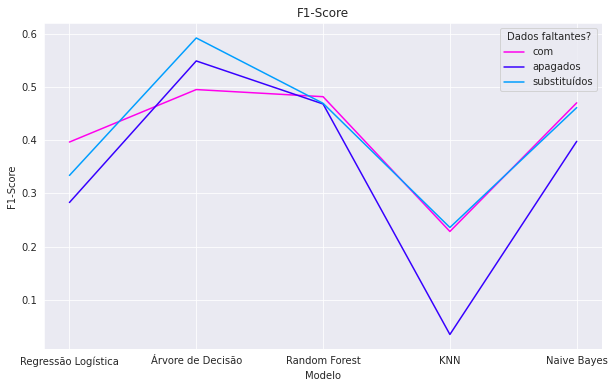

In [107]:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'Modelo', y = 'F1-Score', hue = 'Dados faltantes?', data = metricas)
plt.ylabel('F1-Score')
plt.xlabel('Modelo')
plt.title('F1-Score')
plt.show()

Nesta métrica, que leva em conta tanto a Precisão quanto a Revocação, o modelo que possuiu maiores valores foi a Árvore de Decisão, isso para todas as formas de lidar com os dados faltantes. Por outro lado, os piores modelos foram os de KNN, já que, como dito anteriormente, sofreram *underfitting*.

Vale ressaltar que, na maioria dos casos, substituir os dados ocasionou um aumento do F1-Score.

# 9. Conclusões finais

Percebemos, então, que a melhor forma de tratar o dataset depende do modelo a ser utilizado e da métrica. 

Em termos gerais, os modelos que produziram métricas com maiores valores foram de Árvore de Decisão. A forma como os dados deste modelo serão tratados depende do interesse maior de quem o possui. Como, em uma primeira análise, parece-nos mais importante a Revocação como métrica,olhando no gráfico desta métrica, concluímos que o melhor tratamento dos dados seria substituí-los, mesmo que, com isso, a Acurácia e a Precisão não sejam as maiores. 
Vale ressaltar que a Árvore de Decisão com critério de Entropia também possuiu maior valor de AUC na curva ROC, de 0.81, quando o dataset ainda possuía dados faltantes. Mesmo assim, substituindo esses dados, o valor passou a ser 0.78, o qual, comparado aos outros valores que obtivemos, continua alto.

Cada modelo possui sua vantagem e desvantagem. Desde que o modelo não sofra *underfitting* ou *overfitting*, cabe a quem o fez decidir qual o melhor para a situação.